# . **PARAMETRAGE DU NOTEBOOK**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.api import linear_harvey_collier
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as scs
import scipy.stats as st
from scipy.stats import t, shapiro
from scipy.stats import anderson
from scipy.stats import shapiro

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors, metrics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier




import warnings
warnings.filterwarnings('ignore')


#pour afficher + de lignes
pd.set_option('display.max_rows', 1500)

C:\Users\akdim\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\akdim\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# . **EXPLORATION DES DONNNEES**

## Chargement du dataset

In [2]:
df = pd.read_csv('billets (1).csv', sep=";", decimal=',')
df.head()

is_genuine diagonal height_left height_right margin_low margin_up  length
0        True   171.81      104.86       104.95       4.52      2.89  112.83
1        True   171.46      103.36       103.66       3.77      2.99  113.09
2        True   172.69      104.48        103.5        4.4      2.94  113.16
3        True   171.36      103.91       103.94       3.62      3.01  113.51
4        True   171.73      104.28       103.46       4.04      3.48  112.54

## Explication des variables

* **is_genuine** : Authenticité du billet est il vrai ou faux
* **diagonal** : la diagonale du billet (en mm) 
* **length** : la longueur du billet (en mm) 
* **height_left** : la hauteur du billet (mesurée sur le côté gauche, en mm)
* **height_right** : La hauteur du billet (mesurée sur le côté droit, en mm)
* **margin_up** : la marge entre bord supérieur du billet (en mm) 
* **margin_low** : la marge entre bord inférieur du billet (en mm)



## Exploration du dataframe

### Format

In [3]:
#taille
df.shape

(1500, 7)

* le df est composé de 1500 billets et 7 paramètres de caractéristiques

In [4]:
#format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_genuine    1500 non-null   bool  
 1   diagonal      1500 non-null   object
 2   height_left   1500 non-null   object
 3   height_right  1500 non-null   object
 4   margin_low    1463 non-null   object
 5   margin_up     1500 non-null   object
 6   length        1500 non-null   object
dtypes: bool(1), object(6)
memory usage: 71.9+ KB


In [5]:
#modification du format objet en float
df['diagonal'] = df['diagonal'].astype(float)
df['height_left'] = df['height_left'].astype(float)
df['height_right'] = df['height_right'].astype(float)
df['margin_low'] = df['margin_low'].astype(float)
df['margin_up'] = df['margin_up'].astype(float)
df['length'] = df['length'].astype(float)

In [6]:
#on vérifie
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


* ok format modifié

Text(0.5, 1.0, 'Répartition authenticité des billets')

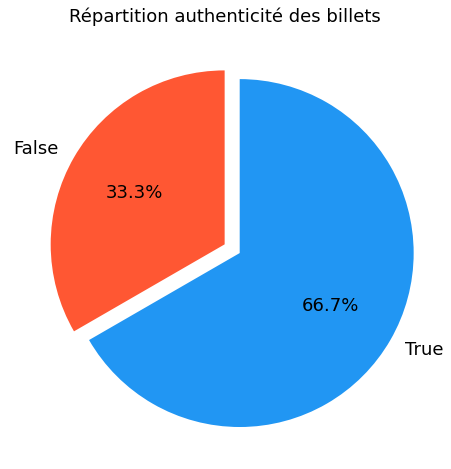

In [7]:
# Répartition de l'authenticité des billets
fig, ax = plt.subplots(figsize=(8, 8))
counts = df['is_genuine'].value_counts()
explode = (0.1, 0)
colors = ['#2196F3','#FF5733' ]
ax.pie(counts, explode=explode, labels=counts.index, colors=colors,
       autopct='%1.1f%%', startangle=90, textprops={'fontsize': 18}, counterclock=False)
ax.set_title('Répartition authenticité des billets', fontsize=18)


In [8]:
#répartition authenticité numérique
resultat = df.is_genuine.value_counts()
print(resultat)

True     1000
False     500
Name: is_genuine, dtype: int64


* **66.67% des billets sont vrai soit 1500 billets**
* **33.33% des billets sont faux soit 500 billets**

### Valeurs manquantes et doublons

In [9]:
#doublons
df.duplicated().mean()

0.0

In [10]:
#valeurs manquantes
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

* Pas de doublons mais 37 valeurs manquantes détectées pour la variable margin low

### Valeurs aberrantes

#### Boxplot

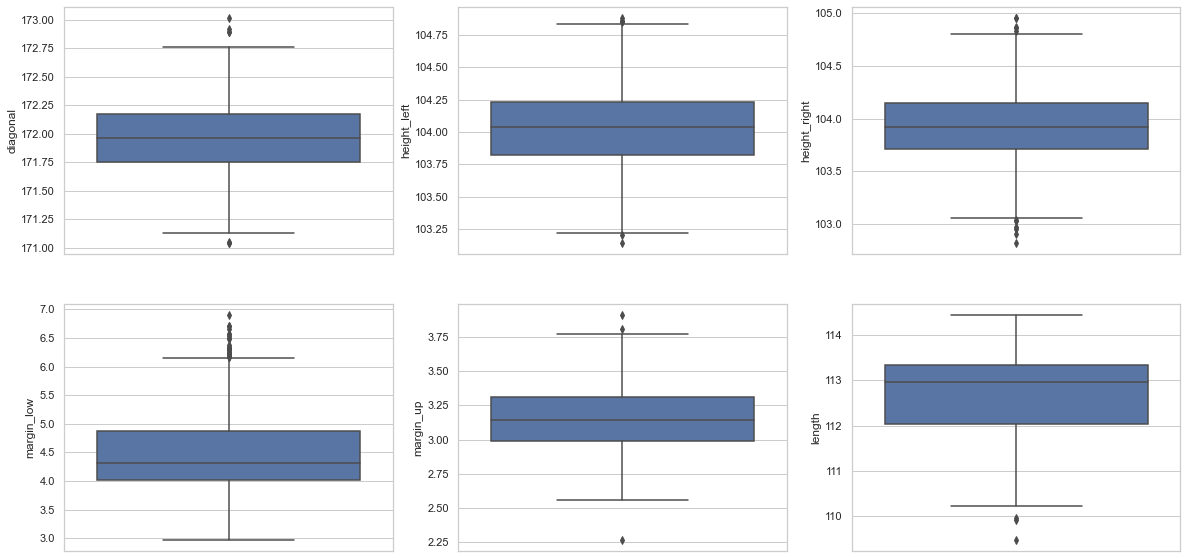

In [11]:
sns.set()
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

ax1 = plt.subplot(231)
sns.boxplot(data=df,y='diagonal')

ax2 = plt.subplot(232)
sns.boxplot(data=df, y='height_left')

ax3 = plt.subplot(233)
sns.boxplot(data=df, y='height_right')

ax4 = plt.subplot(234)
sns.boxplot(data=df,y='margin_low')

ax5 = plt.subplot(235)
sns.boxplot(data=df,  y='margin_up')

ax6 = plt.subplot(236)
sns.boxplot(data=df,  y='length')

plt.show()

On constate la présence de valeur aberrantes au sein de toutes les variables. On remarque cependant que les variables margin_up et lenght sont les variables qui ont le moins de valeurs aberrantes. On peut émettre l'hypothèse que ces 2 variables seraient les plus fiables. Voyons de plus près s'il existe un lien entre valeurs aberrante et autenthicité du billet.

#### Etude des valeurs aberrantes

Recherche d'un potentiel lien entre les valeurs aberrantes et l'authenticité des billets

* **Diagonal**

In [12]:
#filtre sur les valeurs aberrantes
df.loc[df['diagonal']>172.5]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
2           True    172.69       104.48        103.50        4.40       2.94   
23          True    172.56       103.85        103.62        3.32       3.13   
83          True    172.52       104.32        103.86        3.70       3.14   
107         True    172.69       103.88        104.06        4.27       3.20   
173         True    172.58       104.03        103.90        3.79       2.92   
187         True    172.74       104.05        104.17        3.68       3.38   
231         True    172.76       104.22        104.00        4.20       3.27   
311         True    172.58       103.99        103.63        4.43       3.07   
340         True    172.52       103.90        104.03        3.97       2.98   
344         True    172.53       103.97        103.28        4.61       3.41   
410         True    172.56       103.72        103.51         NaN       3.12   
417         True    172.73       104.02        104.18        3.74       3.20   
446         True    172.51       104.53        103.50        4.51       3.07   
453         True    172.54       104.05        103.78        4.34       2.93   
471         True    172.58       104.17        103.13        4.64       3.17   
491         True    172.60       104.83        103.56        4.10       2.94   
493         True    172.55       103.97        104.04        4.25       3.34   
578         True    172.53       103.80        103.82        4.64       3.28   
581         True    172.51       103.57        104.27        3.72       3.33   
609         True    172.53       103.47        103.99        3.84       2.71   
616         True    172.51       104.23        103.85        4.74       2.91   
631         True    172.75       104.33        103.97        4.34       3.14   
653         True    172.53       103.99        103.55        4.50       3.10   
665         True    172.57       104.65        104.44        4.54       2.99   
683         True    172.59       104.22        104.01        4.47       2.95   
751         True    172.67       104.69        104.18        4.31       2.94   
767         True    172.62       104.00        104.03        4.31       3.29   
775         True    172.53       104.29        103.87        4.17       2.98   
784         True    172.51       103.78        103.94        4.24       3.39   
828         True    172.92       103.55        103.94        4.78       3.27   
836         True    172.52       103.98        103.74        4.66       3.19   
842         True    172.89       103.77        104.24        4.12       3.01   
843         True    172.61       103.98        103.73        3.87       3.16   
884         True    172.57       103.78        103.65        4.27       3.04   
892         True    172.63       104.13        104.17        3.77       3.45   
1004       False    172.55       104.25        104.23        5.60       3.13   
1022       False    172.89       104.03        104.03        6.03       3.00   
1097       False    172.51       104.43        104.17        5.11       3.08   
1195       False    172.61       104.31        104.13        5.85       3.27   
1236       False    172.57       104.13        104.19        5.10       3.45   
1277       False    173.01       104.59        104.31        5.04       3.05   
1431       False    172.52       104.11        104.35        5.30       3.31   
1435       False    172.66       104.33        104.41         NaN       3.56   
1450       False    172.72       104.05        104.17        4.21       3.37   
1485       False    172.52       104.48        104.17        5.16       3.39   

      length  
2     113.16  
23    113.37  
83    113.36  
107   113.22  
173   113.57  
187   113.12  
231   113.69  
311   112.79  
340   113.30  
344   113.25  
410   112.95  
417   113.52  
446   113.21  
453   114.14  
471   113.05  
491   113.38  
493   113.36  
578   113.54  
581   113.47  
609   112.74  
616   112.

In [13]:
#filtre sur les valeurs aberrantes
df.loc[df['diagonal']<171.25]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
421         True    171.19       103.95        103.73        3.96       2.94   
557         True    171.24       103.81        103.74        4.69       3.29   
636         True    171.13       104.28        103.14        4.16       2.92   
729         True    171.04       103.84        103.64        4.22       3.36   
1020       False    171.14       104.31        104.30        5.46       3.29   
1069       False    171.21       104.29        104.41        5.14       3.26   
1089       False    171.13       104.13        104.26        3.86       3.69   
1099       False    171.19       104.18        104.01        4.82       3.18   
1142       False    171.04       104.23        104.22        4.87       3.56   
1254       False    171.15       104.09        104.30        6.49       3.20   
1388       False    171.05       104.09        104.50        4.72       3.10   
1417       False    171.21       103.92        104.29        5.18       3.12   
1467       False    171.16       103.80        103.93        4.95       3.36   

      length  
421   113.25  
557   113.53  
636   113.00  
729   112.70  
1020  111.57  
1069  111.16  
1089  111.52  
1099  111.73  
1142  111.54  
1254  111.61  
1388  112.44  
1417  111.70  
1467  112.29

In [14]:
#Tri croissant sur les valeurs de diagonal
df.sort_values(by = 'diagonal')

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1142       False    171.04       104.23        104.22        4.87       3.56   
729         True    171.04       103.84        103.64        4.22       3.36   
1388       False    171.05       104.09        104.50        4.72       3.10   
1089       False    171.13       104.13        104.26        3.86       3.69   
636         True    171.13       104.28        103.14        4.16       2.92   
1020       False    171.14       104.31        104.30        5.46       3.29   
1254       False    171.15       104.09        104.30        6.49       3.20   
1467       False    171.16       103.80        103.93        4.95       3.36   
421         True    171.19       103.95        103.73        3.96       2.94   
1099       False    171.19       104.18        104.01        4.82       3.18   
1069       False    171.21       104.29        104.41        5.14       3.26   
1417       False    171.21       103.92        104.29        5.18       3.12   
557         True    171.24       103.81        103.74        4.69       3.29   
56          True    171.25       104.23        103.93        4.36       2.68   
1384       False    171.26       104.19        104.26        5.17       3.35   
1181       False    171.26       104.02        103.93        5.60       3.12   
220         True    171.26       103.59        103.80        4.11       3.25   
776         True    171.26       103.87        104.41        4.43       2.88   
1270       False    171.26       104.22        104.07        4.78       3.81   
131         True    171.27       104.14        103.78        3.91       2.69   
169         True    171.28       104.20        103.89        4.29       3.06   
225         True    171.29       104.22        104.16        4.37       3.14   
1487       False    171.30       104.49        103.89        4.88       3.17   
16          True    171.30       104.19        103.70        4.12       2.82   
1287       False    171.31       103.95        104.07        5.14       3.41   
1139       False    171.32       104.20        104.09        5.67       3.19   
1098       False    171.32       104.28        104.36        5.08       3.69   
1301       False    171.33       104.28        104.19        5.72       3.25   
232         True    171.34       104.26        104.06        3.77       3.20   
1457       False    171.34       104.43        104.28        4.70       3.39   
804         True    171.34       103.95        103.29        4.89       2.76   
73          True    171.35       103.58        103.59        4.08       2.85   
734         True    171.35       103.70        103.43        3.71       3.22   
802         True    171.35       104.62        103.58        4.32       2.88   
359         True    171.36       103.59        103.68        4.44       3.32   
3           True    171.36       103.91        103.94        3.62       3.01   
921         True    171.36       103.72        104.76        4.17       2.88   
518         True    171.36       104.15        103.76        3.44       3.31   
807         True    171.36       103.61        103.96        3.97       3.22   
1067       False    171.37       104.08        104.16        5.55       3.55   
871         True    171.37       104.07        103.75         NaN       3.07   
1012       False    171.37       103.73        104.18        4.97       3.34   
1300       False    171.38       104.13        104.22        5.67       3.46   
1372       False    171.38       104.04        104.20        5.54       3.38   
805         True    171.38       103.75        103.16        4.32       3.02   
1350       False    171.38       103.78        103.70        5.22       3.43   
860         True    171.38       103.83        103.99        4.44       3.12   
1118       False    171.38       104.52        104.22        4.58       3.41   
1185       False    171.38       104.39        104.56        5.96       3.25   
1085  

*Il n'est pas possible de déterminer à partir de la diagonal un intervalle à partir duquel nous pourrions dire si le billet est vrai ou faux car nous avons des valeurs vraies et fausse. On peut donc supposer que la diagonale ne semble pas être un critère qui influe sur l'authenticité d'un billet*

* **Height_left**

In [15]:
#filtre sur les valeurs aberrantes
df.loc[df['height_left']>104.75]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
491         True    172.60       104.83        103.56        4.10       2.94   
905         True    171.99       104.76        104.55        4.39       3.02   
965         True    171.42       104.79        104.16        3.45       3.16   
1090       False    172.11       104.88        104.10        4.80       3.73   
1092       False    171.87       104.76        104.02        6.30       3.61   
1150       False    171.79       104.86        104.34        5.39       3.14   
1310       False    171.92       104.84        104.60        5.96       2.92   
1382       False    171.97       104.85        104.52        5.87       3.56   

      length  
0     112.83  
491   113.38  
905   113.70  
965   112.64  
1090  110.78  
1092  111.29  
1150  113.02  
1310  110.69  
1382  110.98

In [16]:
df.loc[df['height_left']<103.25]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
122        True    171.81       103.22        103.92        3.99       3.06   
224        True    172.12       103.20        103.92        4.46       3.26   
230        True    172.32       103.22        104.00        4.01       3.08   
292        True    172.09       103.14        103.81        4.88       3.01   
302        True    171.65       103.22        104.11        3.51       3.04   
646        True    171.59       103.23        103.64        4.01       2.94   

     length  
122  113.32  
224  113.44  
230  112.87  
292  113.69  
302  113.40  
646  113.59

In [17]:
#Tri croissant sur les valeurs de height_left
df.sort_values(by = 'height_left')

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
292         True    172.09       103.14        103.81        4.88       3.01   
224         True    172.12       103.20        103.92        4.46       3.26   
230         True    172.32       103.22        104.00        4.01       3.08   
302         True    171.65       103.22        104.11        3.51       3.04   
122         True    171.81       103.22        103.92        3.99       3.06   
646         True    171.59       103.23        103.64        4.01       2.94   
515         True    172.21       103.25        103.78        4.48       3.00   
209         True    172.23       103.25        103.97        4.01       3.38   
601         True    171.74       103.25        104.07        3.80       2.95   
251         True    171.80       103.26        102.82         NaN       2.95   
803         True    171.87       103.27        104.50        3.85       3.03   
920         True    171.85       103.27        103.96        4.00       2.65   
267         True    171.48       103.27        103.42        3.84       3.04   
769         True    171.99       103.27        103.31        3.78       3.00   
76          True    171.65       103.30        103.55        4.14       3.37   
706         True    172.17       103.31        103.89        4.38       3.13   
181         True    172.37       103.31        103.50        3.79       3.13   
168         True    172.21       103.32        103.99        4.11       3.04   
786         True    171.42       103.33        103.54        3.87       3.39   
219         True    172.11       103.33        103.80        4.55       2.91   
779         True    172.13       103.34        103.62        3.93       2.86   
812         True    171.58       103.34        103.82        3.53       2.92   
941         True    172.13       103.35        104.17        4.23       3.27   
101         True    171.55       103.35        103.69        4.31       3.19   
612         True    171.95       103.35        103.76        3.85       3.29   
1           True    171.46       103.36        103.66        3.77       2.99   
346         True    172.32       103.38        103.74        4.43       2.77   
997         True    171.78       103.38        104.22        4.23       3.07   
407         True    172.50       103.39        103.99        4.45       3.06   
163         True    171.90       103.40        103.45        4.09       3.33   
362         True    171.62       103.40        104.05        3.53       2.96   
620         True    171.87       103.40        103.82        4.06       2.94   
753         True    171.96       103.40        104.29        3.77       3.24   
43          True    172.40       103.41        103.85        4.01       3.15   
785         True    172.19       103.42        103.61        4.18       3.12   
625         True    172.05       103.42        104.10        4.45       2.99   
80          True    171.89       103.42        103.35        4.92       3.02   
55          True    171.56       103.42        103.64        3.77       3.04   
130         True    171.66       103.43        103.54        4.38       3.51   
594         True    171.65       103.43        103.83        4.36       3.10   
78          True    171.71       103.43        103.61        4.11       2.97   
26          True    171.83       103.44        103.70        4.15       3.10   
551         True    171.56       103.44        104.09        4.41       2.97   
332         True    171.95       103.44        103.80        4.08       3.19   
303         True    172.02       103.45        103.79        3.91       3.00   
250         True    172.38       103.45        104.11        4.72       3.01   
61          True    171.90       103.46        104.22        3.99       3.00   
326         True    171.42       103.47        103.82        4.35       3.05   
609         True    172.53       103.47        103.99        3.84       2.71   
720   

*Il n'est pas non plus possible ici de déterminer un intervalle fiable sur la seule base de l'analyse du côté droit car nous avons comme précédemment des billets vraie et faux portant la même valeur.Pour autant il semblerait ici que plus le côté gauche du billet est court plus le billet a de chance d'être vrai.*

* **height_right**

In [18]:
#filtre sur les valeurs aberrantes
df.loc[df['height_right']>104.75]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
921         True    171.36       103.72        104.76        4.17       2.88   
1051       False    171.81       103.91        104.77        5.28       3.58   
1199       False    172.03       104.32        104.87        4.49       3.77   
1210       False    172.29       104.43        104.80        4.86       3.30   
1321       False    172.29       104.72        104.86        5.71       3.16   
1331       False    172.32       104.60        104.83        4.84       3.51   
1401       False    171.62       104.32        104.76        4.92       3.41   
1484       False    172.08       103.96        104.95        5.22       3.45   

      length  
0     112.83  
921   113.14  
1051  111.33  
1199  111.04  
1210  111.53  
1321  112.15  
1331  112.55  
1401  112.40  
1484  112.07

In [19]:
df.loc[df['height_right']<103.25]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
19         True    171.90       103.67        103.15        4.55       3.15   
77         True    171.84       104.09        103.03        4.11       2.77   
174        True    171.55       104.40        103.17        4.54       2.83   
176        True    171.75       103.63        102.97        4.46       2.77   
193        True    172.35       103.73        102.95        4.49       3.37   
206        True    172.18       103.68        103.14        4.16       3.18   
216        True    171.74       104.43        103.09        4.23       3.15   
233        True    172.26       104.16        103.20        4.55       3.35   
251        True    171.80       103.26        102.82         NaN       2.95   
353        True    172.21       103.80        103.23        3.70       2.98   
375        True    171.54       104.64        103.06        3.54       3.09   
384        True    171.65       103.50        103.24        3.82       2.56   
445        True    172.34       104.42        103.22         NaN       3.01   
450        True    172.01       104.11        103.13        4.53       2.96   
471        True    172.58       104.17        103.13        4.64       3.17   
522        True    172.02       104.42        102.91        3.86       3.12   
636        True    171.13       104.28        103.14        4.16       2.92   
761        True    172.16       103.93        103.04        4.14       2.99   
805        True    171.38       103.75        103.16        4.32       3.02   
814        True    171.87       103.94        103.22        3.71       3.09   
838        True    171.72       103.96        103.19        3.81       2.83   
841        True    172.36       103.92        103.08        3.69       3.10   
862        True    172.08       103.78        103.13        3.44       2.88   
867        True    172.12       104.32        103.19        4.04       3.28   
969        True    171.75       103.60        103.06        4.03       2.98   

     length  
19   113.12  
77   113.18  
174  113.30  
176  113.22  
193  112.49  
206  113.93  
216  113.19  
233  113.23  
251  113.22  
353  112.95  
375  112.82  
384  112.98  
445  112.97  
450  113.45  
471  113.05  
522  113.43  
636  113.00  
761  113.26  
805  113.25  
814  113.19  
838  113.27  
841  112.88  
862  113.22  
867  113.11  
969  112.96

In [20]:
#Tri croissant sur les valeurs de height_right
df.sort_values(by = 'height_right')

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
251         True    171.80       103.26        102.82         NaN       2.95   
522         True    172.02       104.42        102.91        3.86       3.12   
193         True    172.35       103.73        102.95        4.49       3.37   
176         True    171.75       103.63        102.97        4.46       2.77   
77          True    171.84       104.09        103.03        4.11       2.77   
761         True    172.16       103.93        103.04        4.14       2.99   
969         True    171.75       103.60        103.06        4.03       2.98   
375         True    171.54       104.64        103.06        3.54       3.09   
841         True    172.36       103.92        103.08        3.69       3.10   
216         True    171.74       104.43        103.09        4.23       3.15   
471         True    172.58       104.17        103.13        4.64       3.17   
862         True    172.08       103.78        103.13        3.44       2.88   
450         True    172.01       104.11        103.13        4.53       2.96   
636         True    171.13       104.28        103.14        4.16       2.92   
206         True    172.18       103.68        103.14        4.16       3.18   
19          True    171.90       103.67        103.15        4.55       3.15   
805         True    171.38       103.75        103.16        4.32       3.02   
174         True    171.55       104.40        103.17        4.54       2.83   
838         True    171.72       103.96        103.19        3.81       2.83   
867         True    172.12       104.32        103.19        4.04       3.28   
233         True    172.26       104.16        103.20        4.55       3.35   
445         True    172.34       104.42        103.22         NaN       3.01   
814         True    171.87       103.94        103.22        3.71       3.09   
353         True    172.21       103.80        103.23        3.70       2.98   
384         True    171.65       103.50        103.24        3.82       2.56   
641         True    171.79       103.51        103.25        4.05       3.08   
963         True    172.09       103.65        103.25        3.96       2.85   
364         True    172.29       103.83        103.25        3.62       2.99   
883         True    171.73       104.38        103.26        4.00       3.04   
768         True    171.69       103.91        103.26        4.04       3.22   
577         True    172.01       103.62        103.26        4.91       2.86   
81          True    171.85       103.87        103.27        4.09       2.95   
529         True    172.16       104.17        103.27        4.10       3.11   
479         True    171.87       103.86        103.27        4.14       3.14   
119         True    171.89       103.66        103.28        3.79       3.03   
875         True    171.94       104.09        103.28        3.98       3.13   
344         True    172.53       103.97        103.28        4.61       3.41   
133         True    171.54       104.36        103.28        3.99       3.21   
741         True    172.17       103.75        103.29        4.43       2.88   
886         True    172.00       104.35        103.29        3.73       3.11   
804         True    171.34       103.95        103.29        4.89       2.76   
746         True    172.02       103.73        103.31        4.35       3.07   
204         True    171.88       103.83        103.31        4.36       3.07   
715         True    172.36       104.11        103.31        4.04       2.98   
810         True    172.17       104.44        103.31        4.15       3.31   
769         True    171.99       103.27        103.31        3.78       3.00   
599         True    172.31       103.93        103.32        4.73       2.85   
958         True    172.15       103.84        103.32        4.21       3.03   
235         True    171.77       103.62        103.32        3.90       3.17   
519   

*On retrouve la même analyse que pour le côté gauche. il est difficile de déterminer un intervalle pour autant il semblerait que plus le côté gauche soit court plus le billet a de chance d'être vrai.*

* **margin_low**

In [21]:
#filtre sur les valeurs aberrantes
df.loc[df['margin_low']>5]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
664         True    172.05       103.70        103.75        5.04       2.27   
1003       False    172.02       104.33        104.33        5.19       3.21   
1004       False    172.55       104.25        104.23        5.60       3.13   
1005       False    171.88       104.30        104.18        5.34       3.33   
1008       False    172.30       104.28        103.90        5.10       3.57   
1013       False    171.98       104.18        103.59        5.44       3.39   
1014       False    171.73       103.99        103.86        5.55       3.33   
1015       False    171.86       104.51        104.29        5.97       3.54   
1016       False    171.99       104.23        104.33        5.13       3.21   
1017       False    171.81       104.37        104.18        5.90       3.52   
1018       False    171.79       104.18        103.87        5.55       3.25   
1019       False    172.16       104.03        104.44        5.33       3.33   
1020       False    171.14       104.31        104.30        5.46       3.29   
1022       False    172.89       104.03        104.03        6.03       3.00   
1023       False    172.02       104.26        104.20        6.20       3.58   
1026       False    171.88       103.85        103.96        5.10       3.31   
1027       False    171.63       104.02        104.66        6.70       3.28   
1028       False    171.74       104.05        103.93        5.38       3.49   
1029       False    171.96       104.29        104.03        6.01       3.91   
1030       False    171.96       104.45        104.48        5.31       3.42   
1031       False    172.40       104.00        103.82        6.33       3.10   
1033       False    171.72       104.06        103.80        5.69       3.64   
1034       False    172.35       103.79        104.35        5.18       3.35   
1035       False    172.05       104.37        104.14        5.38       3.27   
1036       False    171.58       104.13        104.67        5.86       3.52   
1037       False    172.09       104.24        103.83        5.10       3.37   
1038       False    172.08       104.10        103.96        5.64       3.13   
1039       False    171.65       104.12        104.33        5.56       3.19   
1040       False    171.91       104.08        104.16        5.91       3.41   
1041       False    171.77       104.12        104.42        6.65       3.63   
1045       False    172.40       104.05        103.94        5.01       3.43   
1046       False    172.07       104.36        104.04        5.60       3.29   
1048       False    172.16       104.24        104.47        6.08       3.49   
1049       False    171.69       104.09        104.49        5.28       3.51   
1050       False    171.96       104.24        103.75        5.50       3.29   
1051       False    171.81       103.91        104.77        5.28       3.58   
1052       False    172.13       104.09        104.16        5.45       3.38   
1053       False    171.85       104.52        104.05        6.21       3.43   
1054       False    172.39       104.16        103.92        5.66       3.39   
1055       False    171.74       104.07        104.08        5.06       3.52   
1057       False    172.02       104.43        104.37        5.59       3.06   
1059       False    172.15       104.41        104.40        5.64       3.25   
1062       False    171.65       104.19        103.96        5.37       2.99   
1064       False    171.87       104.16        104.44        6.04       3.32   
1066       False    171.92       104.39        103.93        5.18       3.02   
1067       False    171.37       104.08        104.16        5.55       3.55   
1068       False    171.89       104.49        104.38        5.20       3.63   
1069       False    171.21       104.29        104.41        5.14       3.26   
1070       False    172.08       104.38        104.22        5.51       3.41   
1072  

*Toutes les valeurs sont fausses. Il semblerait que margin low est un impact fort sur l'authenticité des billets. On peut supposer que tous les billets ayant une marge supérieure à 5.04 sont des billets faux, donc à priori plus la marge basse du billet est longue plus le billet a de chance d'être faux*

In [22]:
#Tri croissant sur les valeurs de margin_low
df.sort_values(by = 'margin_low')

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
897         True    172.00       103.65        103.83        2.98       2.76   
788         True    171.99       103.67        103.76        3.12       2.99   
10          True    171.83       104.14        103.62        3.16       3.18   
477         True    171.95       104.25        103.64        3.24       2.81   
571         True    171.95       103.76        103.99        3.25       2.78   
125         True    171.50       104.03        103.97        3.26       3.54   
390         True    171.66       103.65        103.44        3.26       2.99   
901         True    171.83       104.08        103.70        3.28       2.88   
182         True    171.94       104.44        104.13        3.32       3.02   
754         True    172.34       104.20        103.69        3.32       3.09   
23          True    172.56       103.85        103.62        3.32       3.13   
452         True    171.68       103.48        103.47        3.32       3.11   
354         True    171.96       104.18        104.14        3.35       2.70   
243         True    172.17       103.61        104.33        3.39       2.82   
37          True    171.73       104.10        104.19        3.39       3.19   
426         True    171.91       103.99        103.50        3.41       2.92   
924         True    172.45       103.99        104.39        3.43       2.66   
606         True    171.52       104.52        103.96        3.43       3.01   
862         True    172.08       103.78        103.13        3.44       2.88   
64          True    171.79       103.91        103.94        3.44       2.96   
518         True    171.36       104.15        103.76        3.44       3.31   
965         True    171.42       104.79        104.16        3.45       3.16   
195         True    172.22       103.59        103.81        3.47       3.34   
917         True    171.99       103.62        103.42        3.48       3.37   
848         True    172.44       104.26        103.56        3.48       3.12   
52          True    171.64       104.18        103.78        3.49       3.74   
302         True    171.65       103.22        104.11        3.51       3.04   
595         True    171.96       103.83        103.87        3.52       2.71   
115         True    171.88       103.61        103.46        3.52       2.99   
499         True    172.04       104.34        103.55        3.52       3.02   
954         True    171.77       103.63        103.59        3.52       3.32   
815         True    171.90       104.22        103.56        3.52       3.20   
583         True    171.68       103.84        103.98        3.52       3.01   
362         True    171.62       103.40        104.05        3.53       2.96   
812         True    171.58       103.34        103.82        3.53       2.92   
172         True    172.26       104.09        103.56        3.53       2.99   
375         True    171.54       104.64        103.06        3.54       3.09   
277         True    172.08       104.16        104.17        3.54       3.29   
667         True    171.58       103.65        103.37        3.54       3.19   
342         True    171.78       103.94        103.84        3.55       2.97   
999         True    171.56       104.07        103.58        3.55       3.02   
414         True    172.30       104.12        103.89        3.55       2.93   
201         True    171.71       104.27        104.19        3.56       3.15   
900         True    171.65       103.84        104.25        3.56       3.22   
766         True    172.46       103.89        103.74        3.57       3.02   
288         True    172.21       104.22        103.57        3.57       3.17   
394         True    171.67       104.57        103.43        3.57       3.25   
923         True    171.49       104.24        104.32        3.58       3.07   
837         True    172.18       103.60        103.76        3.59       2.75   
108   

*Le tri croissant confirme ce que nous avons vu précédemment on peut supposer que plus la marge basse est petite et plus le billet a de chance d'être vrai*

* **margin_up**

In [23]:
#filtre sur les valeurs aberrantes
df.loc[df['margin_up']>3.73]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
52          True    171.64       104.18        103.78        3.49       3.74   
1029       False    171.96       104.29        104.03        6.01       3.91   
1199       False    172.03       104.32        104.87        4.49       3.77   
1237       False    171.72       104.05        104.36        5.40       3.75   
1270       False    171.26       104.22        104.07        4.78       3.81   
1297       False    171.96       104.47        104.06        4.84       3.76   
1478       False    172.36       103.93        104.00        6.08       3.76   

      length  
52    113.94  
1029  110.83  
1199  111.04  
1237  111.59  
1270  112.88  
1297  111.04  
1478  112.89

In [24]:
df.loc[df['margin_up']<2.93]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
7           True    171.88       103.76        104.08        3.98       2.92   
14          True    172.06       103.87        103.83        4.09       2.92   
15          True    171.73       103.92        103.74        4.43       2.78   
16          True    171.30       104.19        103.70        4.12       2.82   
21          True    171.82       103.65        103.64        4.25       2.80   
22          True    172.10       103.96        103.71        3.93       2.89   
25          True    172.09       103.63        103.33        4.32       2.88   
29          True    171.58       103.59        103.79        4.10       2.92   
30          True    171.71       103.95        103.97        4.00       2.83   
32          True    171.99       103.79        103.90        4.62       2.90   
34          True    172.29       103.61        104.44        4.54       2.69   
40          True    172.44       103.96        104.55        3.73       2.86   
46          True    171.47       103.74        104.42        4.19       2.92   
47          True    172.13       104.15        103.93        3.97       2.87   
49          True    171.82       103.82        103.61        4.42       2.90   
51          True    172.03       103.59        104.09        4.49       2.85   
56          True    171.25       104.23        103.93        4.36       2.68   
63          True    171.98       103.92        103.57        4.14       2.75   
68          True    171.60       103.55        103.74        3.79       2.86   
73          True    171.35       103.58        103.59        4.08       2.85   
74          True    172.49       103.69        103.79        3.81       2.77   
77          True    171.84       104.09        103.03        4.11       2.77   
86          True    172.01       104.58        103.89        3.96       2.87   
88          True    171.93       103.65        103.56        4.12       2.77   
98          True    171.54       103.75        103.62        4.59       2.85   
110         True    172.07       103.72        103.44        4.03       2.90   
111         True    172.03       103.96        103.58        4.06       2.85   
123         True    171.62       104.24        103.85        4.08       2.90   
126         True    172.22       104.07        103.98        4.01       2.83   
131         True    171.27       104.14        103.78        3.91       2.69   
134         True    172.27       104.12        103.96        4.12       2.74   
135         True    171.87       104.71        103.85        4.36       2.71   
140         True    172.47       103.82        103.59        3.85       2.77   
142         True    172.18       104.46        103.80        4.31       2.84   
148         True    172.46       103.99        104.04        4.14       2.68   
150         True    171.72       103.91        104.57        4.08       2.79   
156         True    171.57       103.98        103.40        4.05       2.74   
164         True    172.38       103.98        104.40        3.81       2.80   
165         True    171.81       103.53        103.76        3.91       2.87   
166         True    172.31       104.05        103.51        4.43       2.86   
173         True    172.58       104.03        103.90        3.79       2.92   
174         True    171.55       104.40        103.17        4.54       2.83   
176         True    171.75       103.63        102.97        4.46       2.77   
180         True    171.80       104.17        103.74        4.03       2.92   
184         True    171.84       103.71        103.90        4.61       2.82   
192         True    171.78       103.74        103.55        3.86       2.87   
194         True    171.94       104.34        103.99        4.27       2.87   
211         True    171.78       103.52        103.69        4.31       2.85   
218   

*Pour la variable margin_up il semblerait que tous les billets inférieurs à 2.93 soient vrai, on peut donc supposer que plus la marge haute est petite et plus on a de chance d'obtenir un vrai billet.*

In [25]:
#Tri croissant sur les valeurs de margin_up
df.sort_values(by = 'margin_up')

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
664         True    172.05       103.70        103.75        5.04       2.27   
384         True    171.65       103.50        103.24        3.82       2.56   
675         True    171.60       103.85        103.91         NaN       2.56   
800         True    171.96       104.09        103.67        3.75       2.58   
919         True    171.92       103.68        103.45         NaN       2.58   
979         True    172.00       103.76        104.07        4.36       2.59   
351         True    172.06       103.82        103.73        4.18       2.60   
358         True    172.04       103.95        104.09        4.48       2.61   
718         True    172.43       103.58        103.77        3.95       2.62   
367         True    171.73       104.17        104.02        3.64       2.64   
336         True    171.80       103.96        103.87        3.97       2.65   
920         True    171.85       103.27        103.96        4.00       2.65   
852         True    171.92       103.72        103.66        4.41       2.65   
480         True    171.97       103.62        103.64        4.47       2.65   
924         True    172.45       103.99        104.39        3.43       2.66   
713         True    171.56       103.92        103.50        4.41       2.66   
423         True    171.70       104.32        104.07        4.21       2.67   
260         True    172.27       103.71        103.64        4.64       2.67   
268         True    171.47       104.30        104.01        4.32       2.68   
148         True    172.46       103.99        104.04        4.14       2.68   
56          True    171.25       104.23        103.93        4.36       2.68   
227         True    171.69       103.80        104.10        4.32       2.69   
131         True    171.27       104.14        103.78        3.91       2.69   
34          True    172.29       103.61        104.44        4.54       2.69   
659         True    171.84       103.75        103.38        4.08       2.70   
555         True    172.07       104.18        104.10        4.47       2.70   
354         True    171.96       104.18        104.14        3.35       2.70   
654         True    171.97       103.69        103.54         NaN       2.70   
609         True    172.53       103.47        103.99        3.84       2.71   
677         True    172.05       103.90        103.76        4.52       2.71   
595         True    171.96       103.83        103.87        3.52       2.71   
481         True    171.81       103.53        103.96         NaN       2.71   
135         True    171.87       104.71        103.85        4.36       2.71   
994         True    172.11       104.12        103.83        3.90       2.72   
986         True    171.92       103.61        103.83        4.08       2.72   
996         True    172.16       103.72        103.61        4.30       2.72   
925         True    171.82       103.61        103.84        3.99       2.73   
817         True    172.21       103.96        103.55        3.91       2.73   
319         True    172.05       104.11        104.14        4.73       2.73   
395         True    171.82       104.33        103.83        3.92       2.73   
134         True    172.27       104.12        103.96        4.12       2.74   
918         True    172.48       103.59        104.03        4.10       2.74   
989         True    171.68       103.90        103.68        3.78       2.74   
156         True    171.57       103.98        103.40        4.05       2.74   
63          True    171.98       103.92        103.57        4.14       2.75   
498         True    171.76       104.01        103.68        4.07       2.75   
403         True    171.95       104.03        103.68        4.11       2.75   
639         True    171.88       103.66        103.52        4.66       2.75   
837         True    172.18       103.60        103.76        3.59       2.75   
521   

*margin up semble également avoir un impact fort sur l'authenticité des billets*

* **length**

In [26]:
#filtre sur les valeurs aberrantes
df.loc[df['length']<110.5]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1057       False    172.02       104.43        104.37        5.59       3.06   
1068       False    171.89       104.49        104.38        5.20       3.63   
1074       False    172.14       104.49        103.76        4.36       3.24   
1082       False    171.75       103.96        103.83        5.39       3.54   
1164       False    171.50       104.52        104.19        4.84       3.12   
1191       False    171.42       103.87        104.51        5.07       3.30   
1203       False    172.02       104.22        104.19        5.14       3.73   
1214       False    171.87       104.26        103.99        4.87       3.60   
1221       False    172.27       104.06        104.24        5.43       3.35   
1283       False    171.60       104.23        104.45        5.57       3.45   
1347       False    171.72       104.46        104.12         NaN       3.61   
1355       False    171.68       103.89        103.70        5.97       3.03   
1359       False    172.25       104.52        104.22        4.65       3.43   
1410       False    171.96       103.86        103.86        5.06       3.55   
1453       False    171.55       104.20        104.49        5.42       3.54   

      length  
1057  110.35  
1068  110.48  
1074  110.36  
1082  109.49  
1164  110.37  
1191  110.22  
1203  110.49  
1214  110.48  
1221  110.29  
1283  110.34  
1347  110.31  
1355  109.97  
1359  110.48  
1410  110.44  
1453  109.93

In [27]:
#Tri croissant sur les valeurs de length
df.sort_values(by = 'length')

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1082       False    171.75       103.96        103.83        5.39       3.54   
1453       False    171.55       104.20        104.49        5.42       3.54   
1355       False    171.68       103.89        103.70        5.97       3.03   
1191       False    171.42       103.87        104.51        5.07       3.30   
1221       False    172.27       104.06        104.24        5.43       3.35   
1347       False    171.72       104.46        104.12         NaN       3.61   
1283       False    171.60       104.23        104.45        5.57       3.45   
1057       False    172.02       104.43        104.37        5.59       3.06   
1074       False    172.14       104.49        103.76        4.36       3.24   
1164       False    171.50       104.52        104.19        4.84       3.12   
1410       False    171.96       103.86        103.86        5.06       3.55   
1214       False    171.87       104.26        103.99        4.87       3.60   
1068       False    171.89       104.49        104.38        5.20       3.63   
1359       False    172.25       104.52        104.22        4.65       3.43   
1203       False    172.02       104.22        104.19        5.14       3.73   
1042       False    171.75       103.99        104.21        4.74       3.40   
1443       False    172.19       104.26        104.12        5.23       3.49   
1364       False    171.69       104.18        104.28        5.62       3.23   
1205       False    171.92       103.90        104.58        5.56       3.50   
1312       False    171.92       104.37        104.05        4.95       3.04   
1113       False    171.84       104.52        104.19        4.60       3.47   
1369       False    171.94       104.56        104.25        4.60       3.37   
1008       False    172.30       104.28        103.90        5.10       3.57   
1276       False    172.47       104.27        104.10        4.88       3.33   
1465       False    172.17       103.89        103.87        5.22       3.68   
1093       False    172.08       104.33        103.94        4.77       3.64   
1088       False    171.91       104.26        104.62        5.86       3.44   
1310       False    171.92       104.84        104.60        5.96       2.92   
1162       False    172.46       103.87        104.36        5.56       3.33   
1168       False    171.83       103.56        103.76        5.56       3.49   
1258       False    172.42       103.69        104.29        5.25       3.33   
1485       False    172.52       104.48        104.17        5.16       3.39   
1391       False    172.36       104.01        104.41        5.23       3.07   
1353       False    171.61       104.04        104.06        6.19       3.08   
1291       False    171.84       104.46        104.15        4.51       3.39   
1047       False    171.78       103.95        104.27        4.64       3.29   
1329       False    172.50       104.07        103.71        3.82       3.63   
1419       False    172.13       104.33        103.69        4.75       3.08   
1015       False    171.86       104.51        104.29        5.97       3.54   
1226       False    171.60       103.90        104.29        6.11       3.55   
1244       False    171.91       103.80        103.99        6.14       3.32   
1090       False    172.11       104.88        104.10        4.80       3.73   
1120       False    171.48       104.46        104.24        4.94       3.61   
1135       False    171.81       104.17        103.93        4.77       3.34   
1029       False    171.96       104.29        104.03        6.01       3.91   
1143       False    171.90       104.25        104.64        4.46       3.07   
1184       False    171.97       103.95        103.73        5.15       3.24   
1187       False    171.52       104.18        103.99        5.93       3.26   
1426       False    172.22       103.92        104.03        6.25       3.14   
1006  

*Il semblerait également ici que plus le billet est long et plus il a de chance d'être vrai*

### Conclusion

Les valeurs aberrantes ne sont pas un gage d'authenticité du billet. Nous remarquons cependant que certaines variables semblent avoir un impact sur l'authenticité il s'agit des variables :Lenght, margin up et margin low de manière assez marquée mais également de hight left et hight right. Hypothèse à vérifier avec une matrice de corrélation. De plus il semblerait également qu'un vrai billet soit caractérisé par une longueure plus importante que les billets faux, d'une marge basse,marge haute, d'un côté gauche et d'un côté droit plus petit que les faux billets. L'authenticité du billet semble être donc dépendant des variables margin_up et margin_low mais également de hight right et hight left mais pas de la diagonale.

## Distribution des variables

In [28]:
#encodage de la variable is_geniune
df['is_genuine'].replace([False,True], [0,1], inplace=True)
df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

### Représentation graphique

In [29]:
#Création d'un df sans les valeurs manquantes pour ne pas influencer les résultats
df_train=df.dropna()

Avant de réaliser notre matrice de corrélation pour vérifier l'infuence des variables entre elles vérifions si ces variables suivent une loi normale.

In [30]:
def var_hist(var, i):
    subset = df_train[var]
    n_dataset = len(df_train)
    xbar = np.mean(df_train[var]) # Moyenne
    sprime = np.std(df_train[var], ddof=1) # Ecart-type
    sprime2 = np.var(df_train[var], ddof=1) #Variance non biaisée
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(df_train[var].min(),df_train[var].max(),0.05)
    y = scs.norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

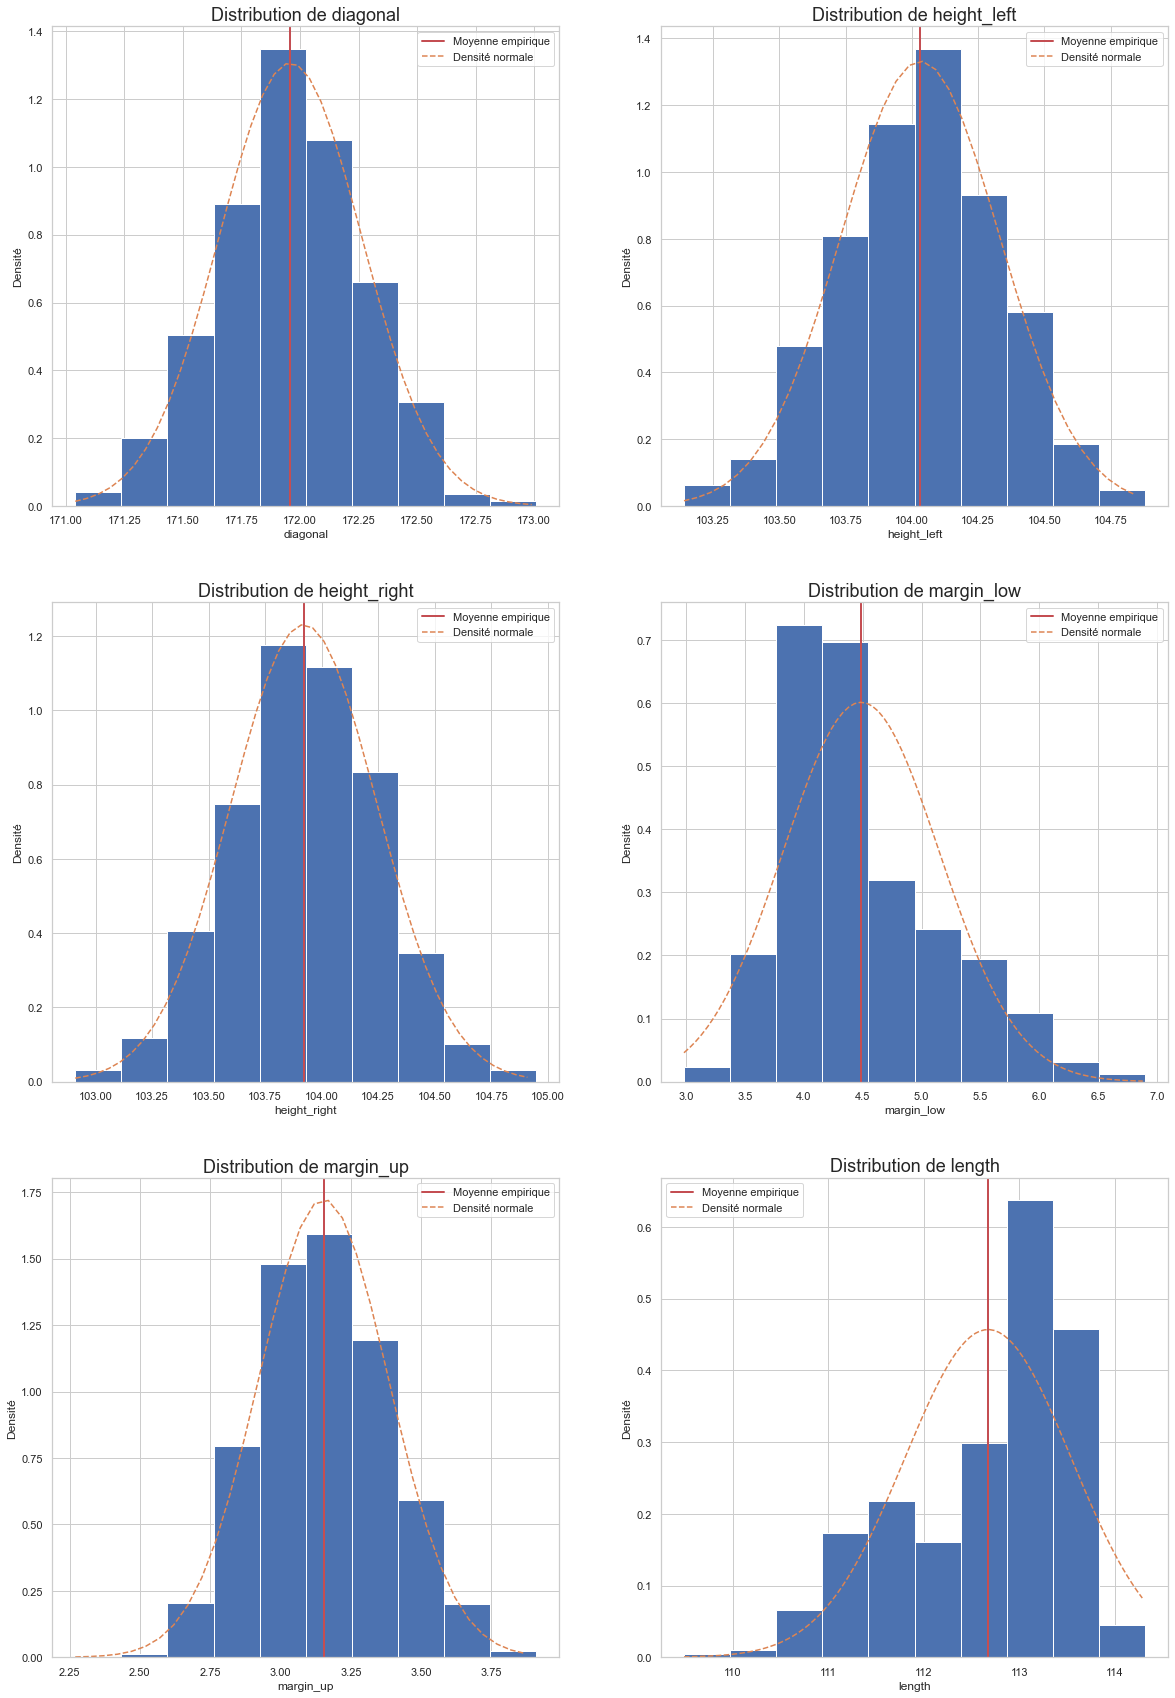

In [31]:
liste_var = ["diagonal","height_left","height_right","margin_low","margin_up","length"]

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 321
for var in liste_var :
    var_hist(var, i)
    i+=1
fig.savefig('distrib.png')

Il semblerait que les variables suivent toutes une loi normale sauf : margin_low et lenght. Vérifions avec un test d'Andrson Darling

### Test de normalité Anderson Darling 

In [32]:
#Test de normalité d'Anderson Darling
#α = 5%
variable1 = (anderson(df_train['diagonal'], dist='norm'))
variable2 = (anderson(df_train['height_left'], dist='norm'))
variable3 = (anderson(df_train['height_right'], dist='norm'))
variable4 = (anderson(df_train['margin_low'], dist='norm'))
variable5 = (anderson(df_train['margin_up'], dist='norm'))
variable6 = (anderson(df_train['length'], dist='norm'))               
                  

print(f"Critical values: {variable1[1]}")
print(f"Significance levels: {variable1[2]}")

print(f"A-D statistic pour diagonal: {variable1[0]}")                  
print(f"A-D statistic pour height_left : {variable2[0]}")                      
print(f"A-D statistic pour height_right: {variable3[0]}")                   
print(f"A-D statistic pour margin_low: {variable4[0]}")                   
print(f"A-D statistic pour margin_up: {variable5[0]}")                   
print(f"A-D statistic pour length: {variable6[0]}")                    


Critical values: [0.574 0.654 0.785 0.916 1.089]
Significance levels: [15.  10.   5.   2.5  1. ]
A-D statistic pour diagonal: 0.42908509516882987
A-D statistic pour height_left : 0.6160359308248644
A-D statistic pour height_right: 0.20426452531341965
A-D statistic pour margin_low: 33.207838460479934
A-D statistic pour margin_up: 1.6289389397161358
A-D statistic pour length: 48.07885400118607


Nous avons ici confirmation qu'il n'est pas possible d'affirmer que margin low et length suivent pas une loi normale (valeur > à la valeur critique (A-D)), mais nous avons également margin_up qui ne semble pas suivre une loi normale de manière moins marquée que les 2 autres. Vérifions avec un Q_Q plot.


Text(0.5, 1.0, 'length')

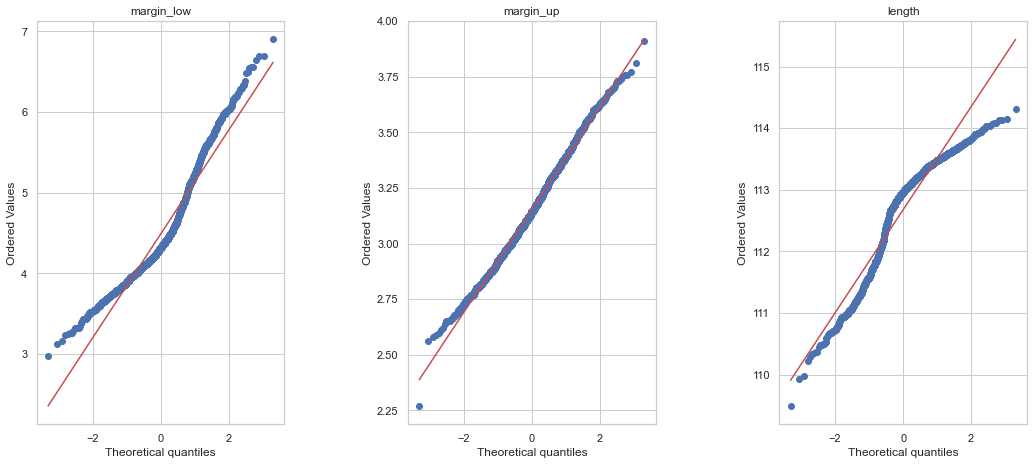

In [33]:
#visualisation graphique de la variable
plt.figure(1,figsize=(10,8))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0)
plt.subplot(1,3,1)
st.probplot(df_train["margin_low"], dist="norm", plot=pylab)
plt.title('margin_low')
plt.subplot(1,3,2)
st.probplot(df_train["margin_up"], dist="norm", plot=pylab)
plt.title('margin_up')
plt.subplot(1,3,3)
st.probplot(df_train["length"], dist="norm", plot=pylab)
plt.title('length')


L'analyse visuelle montre que margin_low et length ne semble pas suivre une distribution normale. La représentation graphique de margin_up ne colle pas non plus à une distrib normale ce qui confirme les résultats des tests calculés.

### Matrice des corrélations 

#### Représentation graphique

La distribution de certaines variables ne suivant pas une loi normal nous allons privilégier l'utilisation d'une heatmap basée sur le test non paramétrique de Spearman. Nous afficherons cependant également celle de pearson pour comparer.

In [34]:
#Matrice des corrélations avec spearman et pearson
spearmancorr = df_train.corr(method='spearman')
pearsoncorr = df_train.corr(method='pearson')

Text(0.5, 1.0, 'Pearson heatmap')

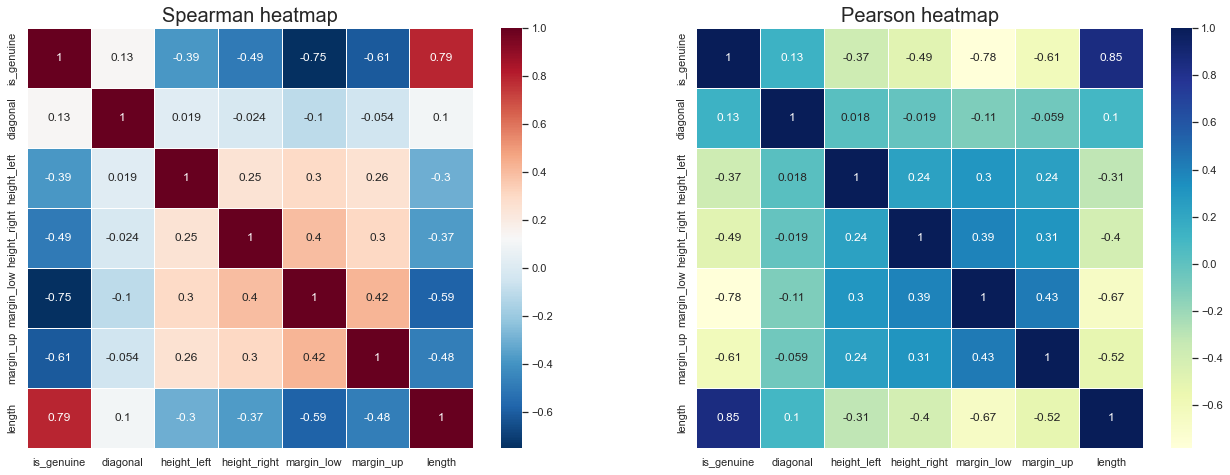

In [35]:
plt.figure(figsize=(22, 17))
plt.subplot(221)
sns.heatmap(spearmancorr, xticklabels=spearmancorr.columns, yticklabels=spearmancorr.columns, cmap='RdBu_r', annot=True, 
linewidth=0.5)
plt.title('Spearman heatmap',fontsize = 20)
plt.subplot(222)
sns.heatmap(pearsoncorr, xticklabels=spearmancorr.columns, yticklabels=pearsoncorr.columns, cmap='YlGnBu', annot=True, 
linewidth=0.5)
plt.title('Pearson heatmap',fontsize = 20)

#### Interprétation

* L'authenticité semble être corrélée fortement avec :
 * Lenght (0.85)
 * Margin_low (-0.78)
 * Margin_up (-0.61)
* L'authenticité semble être corrélée moyennement avec :
 * Hight_right (-0.49)
 * Hight_left (-0.39)
* L'authenticité n'est pas corrélée avec :
 * Diagonal (0.13)

* Margin_low semble être corrélée fortement avec :
 * is_geniune (-0.78)
 * Lenght (-0.67)
* Margin_low semble être corrélée moyennement avec :
 * Margin_up (0.43)
 * Height_right (0.39)
 * Height_left (0.3)
* Margin_low semble n'est pas corrlée avec :
 * Diagonal (-0.11)

* Les heatmap nous apprennent que :
 * L'authenticité dépend fortement des variables length, et des 2 marges hautes et basses
 * Le sens de la corrélation semble confirmer ce que nous avons pu voir précédemment : plus un billet est long et plus il a de chance d'etre vrai et plus les marges sont courtes et plus le billet a de chance d'être vrai. Infos qui pourront nous servir pour la construction de notre algo de détection des vrai et faux billets

 * La variables Margin_low semble est lié aux variables is_geniune et lenght (fortement) et moyennemet aux autres variables sauf la diagonale. Ce qui pourra nous servir afin de pouvoir déterminer les valeurs manquantes de margin_low

# . **IMPUTATION DES VALEURS MANQUANTES**

afin d'imputer nos valeurs manquantes nous allons utiliser une regression lineaire comme conseillé par notre collègue (post_it repris dans la mission)

## Relation entre les variables et margin_low

Avant de réaliser notre regression nous allons tout d'abord vérifier qu'il existe bien une relation linéaire entre notre variable margin_low et les autres variables grâce à un pairplot

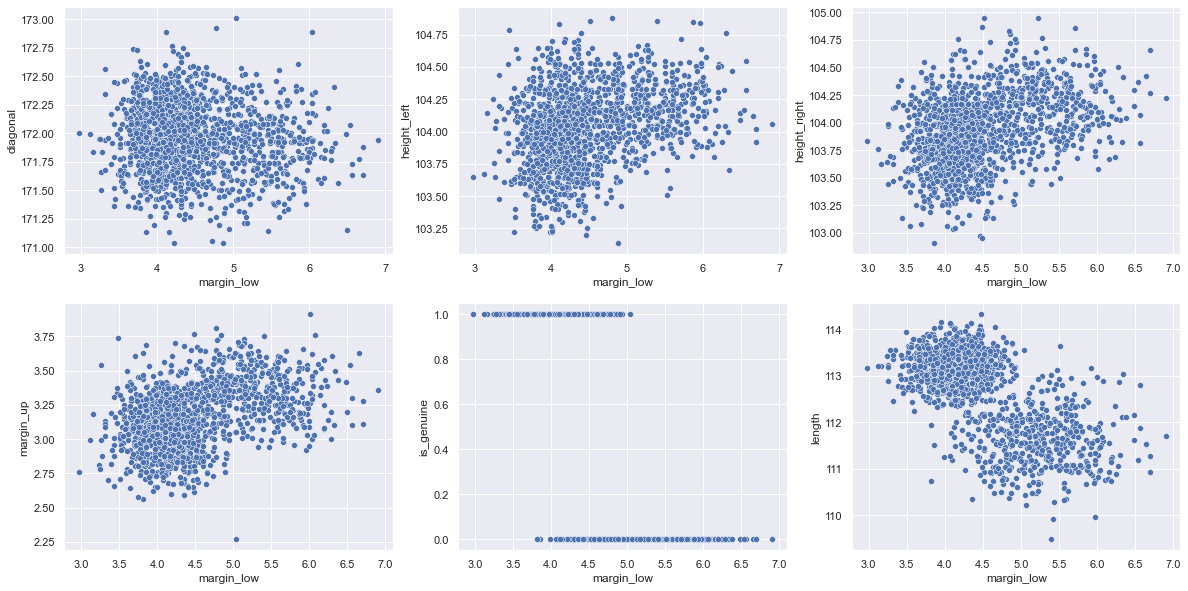

In [36]:
sns.set()
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(231)
ax = sns.scatterplot(x="margin_low", y="diagonal", data=df_train)
ax.set(xlabel='margin_low', ylabel='diagonal')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax2 = plt.subplot(232)
ax = sns.scatterplot(x="margin_low", y="height_left", data=df_train)
ax.set(xlabel='margin_low', ylabel='height_left')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax3 = plt.subplot(233)
ax = sns.scatterplot(x="margin_low", y="height_right", data=df_train)
ax.set(xlabel='margin_low', ylabel='height_right')

ax4 = plt.subplot(234)
ax = sns.scatterplot(x="margin_low", y="margin_up", data=df_train)
ax.set(xlabel='margin_low', ylabel='margin_up')

ax5 = plt.subplot(235)
ax = sns.scatterplot(x="margin_low", y="is_genuine", data=df_train)
ax.set(xlabel='margin_low', ylabel='is_genuine')

ax6 = plt.subplot(236)
ax = sns.scatterplot(x="margin_low", y="length", data=df_train)
ax.set(xlabel='margin_low', ylabel='length')
plt.show()

* Il semble ne pas y avoir de corrélation linéaire entre margin_low et la variable diagonal. Ce qui semble cohérent car d'après la matrice de corrélation vue précédemment ces 2 variables ne seraient pas corrélées.

* Il semble y avoir une correlation linéaire positive forte avec les variables :
    * margin_up
    * height_right
    
* Il semble y avoir une correlation linéaire négativee moyenne avec la variable :
    * lenght

* Il semble y avoir une correlation linéaire positive moyenne avec la variable :
    * height_left (un peu plus dispersée que les autres variables)

Les représentations graphiques par paire + la matrice de corrélation orientent vers la possibilité qu'il existe une corrélation linaire forte entre certaines variables et la variable margin_low. Nous choisissons donc de tester le modèle de regression linaire afin de remplacer nos valeurs manquantes.

## Modèle de regression linéaire

*Le modèle de regression est en générale utilisé afin de prédire la valeur/variance d'une variable dépendante. Nous avons vu précédemment que la valeur de margin low semble être corrélée/dépendante d'autres variables. Nous allons donc utiliser la regression linéaire multiple afin de déterminer les valeurs manquantes de notre dataframe pour la variable margin_low soit 37 valeurs à récupérer.* 

### Conditions d'application de la regression : 

**1/ Les types de variables à utiliser**
  * variable dépendante : continues (théoriquement infini) et non négatives
  * variables indépendantes: doivent être continues ou catégorielles et non négatives 
  
**2/ Pas de variance nulle**

**3/ Aucune multicolinéarité parfaite**: ( il ne doit pas y avoir de corrélation trop fortes entre les variables indépendantes) - indicateur vif à ajouter

**4/ Homéocédasticité (homogénéité des variances des résiduels)** : la variance des valeurs résiduelles doit être similaire à tous les niveaux de la variable indépendante. donc constante.

**5/ Indépendance des erreurs** : les valeurs résiduelles ne doivent pas être corrélées entre les individus

**6/ Distribution normale des résiduels** : bien que les variables indépendantes ne doivent pas nécessairement suivre une distribution normale, il importe que les résiduels en suivent une

**7/ Indépendance de la variable prédite** : toutes les observations formant la distribution des valeurs de la variable dépendante sont indépendantes, viennent d’un individu différent.

**8/ Relation linéaire entre les variables indépendantes et la variable dépendante** : la variation de la variable dépendante pour chaque augmentation d’une unité d’une variable indépendante suit une ligne droite

### Mode d'évaluation des résultats de la regression

Pour évaluer notre modèle nous utiliserons La régression OLS (moindres carrés ordinaires). C'est une technique qui permet d'estimer les coefficients d'une régression linéaire qui décrivent les relations entre une ou plusieurs variables quantitatives et une variable dépendante (selon si la régression linéaire est simple ou multiple). Les moindres carrés désignent l'erreur quadratique minimale.

### Mode de selection des variables

Après avoir réaliser notre regression lineaire, nous selectionnerons seulement les variables significatives. Il existes plusieurs méthodes de selection (cf cidessous)

* Méthode descendante (backward) : on construit le modèle complet; On reconstruit un modèle dans la variable explicative la moins interessante; on itère jusqu'à ce que toutes les variables explicatives soient interessantes.
* Méthode ascendante (forward) : on part du modèle avec la variable la plus intéressante; on ajoute la variable qui , connaissant les autres variables du modèle, apporte le plus d'information complémentaires, on itère jusqu'à ce qu'aucune variable n'apporte d'information intéressante
* Méthode stepwise : compromis entre les 2 première méthodes
* Méthode du R2 ; on construit tous les sous modèles possibles et on retient celui pour lequel la probabilité critique du test R2 est la plus petire (on rejette le plus fortement l'hypothèse : le modèle n'est pas intéressant)

### Préparation des données

In [37]:
data=df_train.drop(['is_genuine'], axis=1)

*Nous avons exclu la variable "is_genuine" des variables explicatives parce que cette variable est la variable cible que nous cherchons à prédire. Cela signifie que la variable "is_genuine" est déjà connue pour toutes les observations dans le jeu de données et ne doit donc pas être incluse dans les variables explicatives pour prédire les valeurs manquantes de la colonne "margin_low".*

*Si nous incluons la variable "is_genuine" comme variable explicative, cela pourrait conduire à un surajustement du modèle et produire des prévisions biaisées. En d'autres termes, le modèle pourrait apprendre à mémoriser les valeurs de "is_genuine" pour chaque observation plutôt que de trouver une relation générale entre les variables explicatives et la colonne "margin_low". Par conséquent, nous avons décidé de l'exclure des variables explicatives lors de l'ajustement du modèle de régression linéaire multiple pour imputer les valeurs manquantes de la colonne "margin_low*

In [38]:
#vérification de la présence de valeurs négatives
display(data[data<0].count())

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [39]:
#calcul de la variance par colonne
print(data.var())

diagonal        0.093304
height_left     0.089763
height_right    0.105093
margin_low      0.440647
margin_up       0.053576
length          0.762516
dtype: float64


Notre variable dépendante est bien continu et nous n'avons aucune valeurs négatives.Les variances des différentes variables sont également différente de 0.Toutes les observations proviennet également d'individus(billets) différents ce qui garanti l'indépendance de la variable margin_low.

In [40]:
# Diviser les données en ensembles de formation et de test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Séparer les caractéristiques (X) et la variable cible (y) pour l'ensemble de formation et de test
X_train = train_data.drop(['margin_low'], axis=1)
y_train = train_data['margin_low']
X_test = test_data.drop(['margin_low'], axis=1)
y_test = test_data['margin_low']

*L'évaluation du modèle se fait sur les données de test lorsqu'on divise les données en ensembles d'entraînement et de test. Le modèle est entraîné sur les données d'entraînement et ensuite testé sur les données de test qui n'ont pas été utilisées pour l'entraînement. Cela permet d'avoir une estimation fiable de la performance du modèle sur de nouvelles données.*

*En utilisant toutes les données pour entraîner le modèle sans division en ensembles d'entraînement et de test, l'évaluation du modèle se fait sur les mêmes données qui ont été utilisées pour l'entraînement. Cette évaluation peut conduire à une surestimation de la performance du modèle.*

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1170, 5)
(293, 5)
(1170,)
(293,)


### Construction du modèle

In [42]:
# Construction du modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Prédire les valeurs de la colonne "margin_low" pour l'ensemble de test
y_pred = model.predict(X_test)

### Evaluation du modèle

#### OLS

On affiche ici un résumé complet de la régression linéaire multiple, y compris les coefficients, les erreurs standards, les statistiques de test et les mesures de qualité du modèle telles que R² et les valeurs de p.

In [44]:
# Concaténer X_train et y_train en un seul dataframe
train_df = pd.concat([X_train, y_train], axis=1)
import statsmodels.formula.api as smf

# Créer un modèle de régression linéaire multiple avec OLS
reg_multi = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=train_df).fit()

# Afficher les résultats de la régression
print(reg_multi.summary())


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sat, 06 May 2023   Prob (F-statistic):          3.54e-153
Time:                        21:25:29   Log-Likelihood:                -825.58
No. Observations:                1170   AIC:                             1663.
Df Residuals:                    1164   BIC:                             1694.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.3960     11.266      1.810   

* **Selection des variables**

In [45]:
def backward_selected(data, response):
    """Linear model designed by backward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
           evaluated by parameters p-value
    """
    remaining = set(data._get_numeric_data().columns)
    if response in remaining:
        remaining.remove(response)
    cond = True

    while remaining and cond:
        formula = "{} ~ {} + 1".format(response,' + '.join(remaining))
        print('_______________________________')
        print(formula)
        model = smf.ols(formula, data).fit()
        score = model.pvalues[1:]
        toRemove = score[score == score.max()]
        if toRemove.values > 0.05:
            print('remove', toRemove.index[0], '(p-value :', round(toRemove.values[0],3), ')')
            remaining.remove(toRemove.index[0])
        else:
            cond = False
            print('is the final model !')
        print('')
    print(model.summary())
    
    return model

In [46]:
#suppression de la variable diagonal dont la p value est > à 5%
columns = ['margin_low','height_left','height_right','margin_up','length']
reg_backward = backward_selected(train_df[columns], 'margin_low')

_______________________________
margin_low ~ height_right + length + height_left + margin_up + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     247.1
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.07e-153
Time:                        21:25:29   Log-Likelihood:                -827.22
No. Observations:                1170   AIC:                             1664.
Df Residuals:                    1165   BIC:                             1690.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------

* Interpretation du summary


 * **No. Observations**: Le nombre d’observations est la taille de l'échantillon, c’est-à-dire N = 1170 (1500 - 37 valeurs manquantes *80%)
 * **Df Residuals**: c'est le degré de liberté des résidus.C'est à dire le nombre d’observations indépendantes sur la base desquelles la somme des carrés est calculée.D.f Résidus = 1170– (4+1) = 1165 . (4+1 = nb de variables+1)
 * **R-squared** :le R-squared est de  0.459, ce qui indique que le modèle explique environ 46% de la variance de la variable dépendante. 
 * **Adj. R-squared** :  0.457 trés proche du R_squared
 * **Prob(F-statistics)** :  1.07e-153 la probabilité est proche de zéro cela implique que, dans l'ensemble, les variables sont significatives.
 * **Coef** : Lorsque length   augmente de 1 unité, margin_low baisse de -0.40 mm en moyenne 
 * **P>|t|** : les p_values de nos variables sont bien < à 5% on peut rejeter H0 et affirmer que nos variables sont siginifcatives
 * **Omnibus/Prob(Omnibus)** :la valeur de l'omnibus est de 66.051  et la probabilité associée est inférieure à 0,05 (valeur de p < 0,05), ce qui indique que les résidus ne suivent pas une distribution normale. Il faudrait donc examiner les résidus de plus près et peut-être envisager d'autres méthodes pour ajuster le modèle.
 * **Skew** : un skew de 0.529 indique une légère inclinaison vers la droite de la distribution, mais la forme globale de la distribution est plutôt symétrique. Cela signifie que la majorité des données se situent autour de la moyenne et que les valeurs extrêmes sont relativement rares. 
 * **Kurkosis** : le kurtosis est de 3.779  , ce qui suggère que les résidus sont légèrement plus pointus que la normale, mais dans l'ensemble, ils ont une forme assez similaire à une distribution normale.
 * **Durbin-watson** :le test de Durbin-Watson a une valeur de 1.975 Cela suggère que les résidus sont relativement indépendants les uns des autres et que la régression linéaire est appropriée pour les données
 * **Prob(Jarque-Bera)** : une probabilité JB très faible de 5.44e-19 indique que les données ne suivent probablement pas une distribution normale

En somme, les résultats suggèrent que les erreurs ne suivent pas une distribution normale et que l'hypothèse d'homoscédasticité pourrait également ne pas être respectée.

Vérifions les autres conditions avant de faire un focus sur l'homosecadsticité 

* **Modèle ajusté**

In [47]:
# Création du modèle ajusté avec OLS
reg_multi = smf.ols('margin_low ~height_left + height_right + margin_up + length', data=train_df).fit()
# Prédire les valeurs de la colonne "margin_low" pour l'ensemble de test avec le modèle ajusté
y_pred = reg_multi.predict(X_test)

##### Multicolinearité

lorsque des variables indépendantes sont corrélées, cela indique que les changements dans une variable sont associés à des changements dans une autre variable. Plus la corrélation est forte, plus il est difficile de changer une variable sans en changer une autre. Il devient difficile pour le modèle d’estimer la relation entre chaque variable indépendante et la variable dépendante indépendamment parce que les variables indépendantes ont tendance à changer à l’unisson.Les estimations des coefficients peuvent fluctuer énormément en fonction des autres variables indépendantes du modèle. Les coefficients deviennent très sensibles aux petits changements dans le modèle.
La multicolinéarité réduit la précision des coefficients estimés, ce qui affaiblit la puissance statistique du modèle de régression. On ne pourra pas faire confiance aux valeurs p pour identifier les variables indépendantes statistiquement significatives

In [48]:
# Calculer les scores VIF pour chaque variable exogène
X_test_with_intercept = sm.add_constant(X_test)
vif_scores = [variance_inflation_factor(X_test_with_intercept.values, i) for i in range(1, X_test_with_intercept.shape[1])]

# Afficher les résultats
for i, vif in enumerate(vif_scores):
    print(f"Variable {i+1} - VIF score: {vif:.2f}")


Variable 1 - VIF score: 1.05
Variable 2 - VIF score: 1.14
Variable 3 - VIF score: 1.31
Variable 4 - VIF score: 1.33
Variable 5 - VIF score: 1.55


Tous les coefficients sont inférieurs à 5, il n'y a donc pas de problème de colinéarité

#### Metriques MAE et RMSE

In [49]:
#calcul sur les données de test
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculer R2
r2 = r2_score(y_test, y_pred)

# Calculer MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculer RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 sur l'ensemble de test: {r2:.4f}")
print(f"MAE sur l'ensemble de test : {mae:.4f}")
print(f"RMSE sur l'ensemble de test : {rmse:.4f}")

R2 sur l'ensemble de test: 0.5393
MAE sur l'ensemble de test : 0.3367
RMSE sur l'ensemble de test : 0.4407


In [50]:
#calcul sur les données d'entrainement
# Prédire les valeurs de la colonne "margin_low" pour l'ensemble d'entraînement avec le modèle ajusté
y_pred_train = reg_multi.predict(X_train)

# Calculer le R2 sur l'ensemble d'entraînement
r2_train = r2_score(y_train, y_pred_train)

# Calculer la MAE sur l'ensemble d'entraînement
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calculer la RMSE sur l'ensemble d'entraînement
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"R2 sur l'ensemble d'entraînement : {r2_train:.3f}")
print(f"MAE sur l'ensemble d'entraînement : {mae_train:.3f}")
print(f"RMSE sur l'ensemble d'entraînement : {rmse_train:.3f}")


R2 sur l'ensemble d'entraînement : 0.459
MAE sur l'ensemble d'entraînement : 0.381
RMSE sur l'ensemble d'entraînement : 0.491


ces métriques permettent d'évaluer la performance d'un modèle sur les données de test. L'évaluation sur les données d'entraînement peut donner une idée de la qualité de l'ajustement du modèle, mais elle ne permet pas de savoir si le modèle généralise bien sur de nouvelles données.

* MAE = l’erreur moyenne que les prédictions du modèle ont par rapport à leurs cibles réelles correspondantes. Plus MAE est proche de 0, plus le modèle est précis

* RMSE = Il mesure la différence moyenne entre les valeurs prédites par un modèle et les valeurs réelles  .RMSE comprises entre 0,2 et 0,5 montrent que le modèle peut prédire les données avec précision.

#### Etude des résidus

In [51]:
# Calculer les résidus 
residuals = y_test - y_pred
# Afficher les résidus
print(residuals)

1208    0.232051
178    -0.019177
281    -0.199647
561    -0.189429
891     0.210288
942     0.505601
1018    0.710042
899     0.096973
756    -0.427995
920     0.148603
1282    0.536572
329    -0.400295
629    -0.551620
831     0.095872
1453   -0.452473
222     0.006051
830     0.219652
77      0.165125
49      0.262473
1118   -0.465317
67     -0.293127
1235    0.759280
1066    0.183605
906    -0.075245
249    -0.041666
964     0.334953
436     0.726305
443     0.381528
1171    0.205190
627     0.173845
1436    0.709732
859    -0.294058
975     0.020044
421    -0.167735
925     0.006760
195    -0.749737
171    -0.351187
1088    0.275169
1283   -0.105531
388     0.042308
977     0.351789
207    -0.441309
1307   -0.269432
869    -0.650372
1360    0.402562
717    -0.470808
1104   -0.293087
1350    0.319304
283     0.283087
1128    0.367096
276     0.080476
506     0.016604
439     0.059143
933     0.046130
870    -0.503631
619    -0.196795
557     0.590462
510     0.063327
426    -0.7503

* **Moyenne des résidus**

In [52]:
# Calculer la moyenne des résidus
mean_residuals = np.mean(residuals)

print(f"Moyenne des résidus : {mean_residuals:}")


Moyenne des résidus : 0.013012712917083483


La moyenne des résidus étant nulle signifie que la somme des résidus est égale à zéro. Cela est cohérent avec la façon dont les résidus sont définis dans la régression linéaire, car les résidus représentent les différences entre les valeurs observées et les valeurs prédites par le modèle. Si la moyenne des résidus est nulle, cela implique que le modèle ne présente pas de biais systématique dans ses prévisions, c'est-à-dire que les valeurs prédites sont aussi souvent supérieures qu'inférieures aux valeurs observées

**def biais** = c'est un écart entre la valeur réelle d'une variable et la valeur mesurée par une méthode ou une étude. Si ce biais n'est pas pris en compte ou corrigé, il peut entraîner des erreurs dans les résultats de l'étude et affecter la validité des conclusions qui en sont tirées.

* **Normalité des résidus**

La normalité des résidus est une hypothèse de base de la régression linéaire multiple, qui doit être respectée pour que les résultats de l'analyse soient fiables.

In [53]:
# Calculer le test de Shapiro-Wilk
stat, p = shapiro(residuals)

# Afficher les résultats
print(f"Statistique de test : {stat:.4f}")
print(f"p-valeur : {p:.4f}")

if p > 0.05:
    print("Les résidus suivent une distribution normale.")
else:
    print("Les résidus ne suivent pas une distribution normale.")


Statistique de test : 0.9848
p-valeur : 0.0034
Les résidus ne suivent pas une distribution normale.


La statistique de test est de 0.9848, ce qui est assez proche de 1, indiquant que la distribution des résidus pourrait être normale. La p-value est faible (0.0034) et inférieure à 5%, ce qui signifie que l'on peu rejeter H0 selon laquelle les résidus suivent une distribution normale. Par conséquent, nous pouvons rejeter l'hypothèse nulle et conclure que les résidus ne suivent pas une distribution normale.

On complète cette analyse avec une représentatuion graphique des résidus

<AxesSubplot:ylabel='Density'>

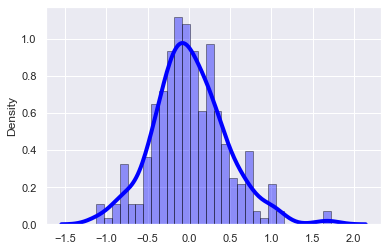

In [54]:
# Afficher la distribution des résidus
sns.distplot(residuals, hist=True, kde=True, 
             bins=int(30), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


Ici, l'hypothèse de normalité est remise en cause (p-value < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien

* **homoscédasticité**

l'hypothèse d'homoscédasticité est importante pour s'assurer que les résidus ont une variance constante à travers toutes les valeurs de la variable prédite, ce qui est essentiel pour obtenir des résultats précis et fiables en régression linéaire.

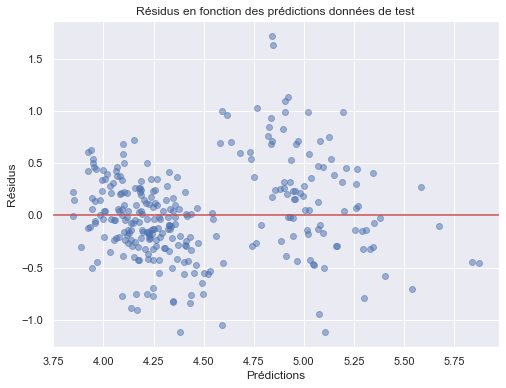

In [55]:
# Concaténer X_test et y_test en un seul dataframe
test_df = pd.concat([X_test, y_test], axis=1)
# Calculer les résidus et les prédictions sur les données de test
y_pred_test = reg_multi.predict(test_df[['height_left', 'height_right', 'margin_up', 'length']])
resid_test = test_df['margin_low'] - y_pred_test

# Réaliser un test de Breusch-Pagan sur les résidus
bp_test = sm.stats.diagnostic.het_breuschpagan(resid_test, test_df[['height_left', 'height_right', 'margin_up', 'length']])

# Représenter graphiquement les résidus en fonction des prédictions
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_pred_test, resid_test, alpha=0.5)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel("Prédictions")
ax.set_ylabel("Résidus")
ax.set_title("Résidus en fonction des prédictions données de test")
plt.show()

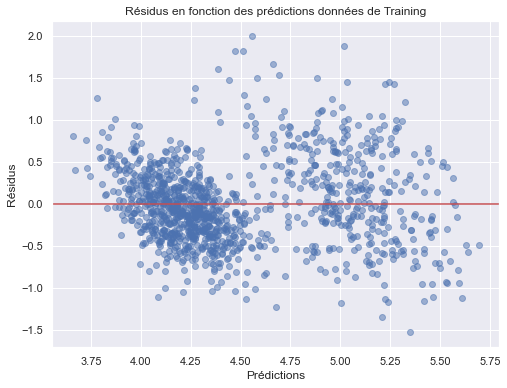

In [56]:
# Concaténer X_train et y_train en un seul dataframe
train_df = pd.concat([X_train, y_train], axis=1)

# Calculer les résidus et les prédictions sur les données de training
y_pred_train = reg_multi.predict(train_df[['height_left', 'height_right', 'margin_up', 'length']])
resid_train = train_df['margin_low'] - y_pred_train

# Réaliser un test de Breusch-Pagan sur les résidus
bp_train = sm.stats.diagnostic.het_breuschpagan(resid_train, train_df[['height_left', 'height_right', 'margin_up', 'length']])

# Représenter graphiquement les résidus en fonction des prédictions
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_pred_train, resid_train, alpha=0.5)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel("Prédictions")
ax.set_ylabel("Résidus")
ax.set_title("Résidus en fonction des prédictions données de Training")
plt.show()


*Graphique de dispersion des résidus en fonction de l'indice des observations. La droite en pointillés représente la valeur 0, qui correspond à la droite de régression. Si les résidus sont homoscédastiques, ils doivent être répartis de manière uniforme autour de cette droite*

In [57]:
# Réaliser un test de Breusch-Pagan sur les résidus
bp_train = sm.stats.diagnostic.het_breuschpagan(resid_train, train_df[['height_left', 'height_right', 'margin_up', 'length']])

# Afficher les résultats du test
print(f"p-value du test de Breusch-Pagan: {bp_train[1]:.4f}")
print(f"Statistique du test de Breusch-Pagan: {bp_train[0]:.4f}")
if bp_train[1] < 0.05:
    print("Les résidus ne sont pas homoscédastiques.")
else:
    print("Les résidus sont homoscédastiques.")


# Vérifier si l'hétéroscédasticité est faible ou élevée
if bp_train[1] < 0.05 and bp_train[0] > 100:
    print("L'hétéroscédasticité est forte.")
elif bp_train[1] < 0.05 and bp_train[0] <= 100:
    print("L'hétéroscédasticité est modérée")
else:
    print("L'hétéroscédasticité est faible.")


p-value du test de Breusch-Pagan: 0.0000
Statistique du test de Breusch-Pagan: 357.6430
Les résidus ne sont pas homoscédastiques.
L'hétéroscédasticité est forte.


Que ce soit sur les données de test ou de training on constate que les résidus ne sont pas homoscedastique d'après le test de Breusch_pagan.L'hétéroscedasticité est dailleurs qualifiée de forte.

La représentation graphique laisse également penser que les résidus sont séparés en 2 nuages de points : le 1er plutôt homogène centré autour de zero et l'autre beaucoup plus éparpillé. on peut supposer que celà est lié à la distribution des résidus en fonction du facteur vrai ou faux. en effet la variance des billets faux est peut être plus importante car il a davantage d'outliers au sein des billets faux

Revérifions tout d'abord s'il n'y pas de rupture dans la variance ce qui pourrait expliquer l'heteroscedasticité 

In [58]:
# Diviser les données en deux sous-échantillons (par exemple en utilisant la médiane de la variable margin_low)
median_margin_low = train_df["margin_low"].median()
df1 = train_df[train_df["margin_low"] <= median_margin_low]
df2 = train_df[train_df["margin_low"] > median_margin_low]

# Estimer deux modèles linéaires (un pour chaque sous-échantillon)
model1 = ols("margin_low ~ height_left + height_right + margin_up + length", data=df1).fit()
model2 = ols("margin_low ~ height_left + height_right + margin_up + length", data=df2).fit()

# Tester la constance de la variance des résidus avec le test de Breusch-Pagan 
bp1 = het_breuschpagan(model1.resid, model1.model.exog)[1]
bp2 = het_breuschpagan(model2.resid, model2.model.exog)[1]

# Tester la rupture de la variance avec le test de Chow
chow = sm.stats.anova_lm(model1, model2)

# Afficher les résultats
print(f"p-value du test de Breusch-Pagan pour le modèle 1: {bp1:.4f}")
print(f"p-value du test de Breusch-Pagan pour le modèle 2: {bp2:.4f}")
print(f"p-value du test de Chow: {chow['Pr(>F)'][1]:.4f}")

if chow['Pr(>F)'][1] < 0.05:
    print("Le modèle présente une rupture de la variance.")
else:
    print("Le modèle ne présente pas de rupture de la variance.")


p-value du test de Breusch-Pagan pour le modèle 1: 0.2436
p-value du test de Breusch-Pagan pour le modèle 2: 0.0000
p-value du test de Chow: 1.0000
Le modèle ne présente pas de rupture de la variance.


Il n'y a pas de rupture de la variance

Regardons du côté des individus influents afin de corriger l'heteroscedasticité

* **Individus influents**

Nous allons calculer plusieurs mesures d'influence et de détection des valeurs aberrantes pour notre modèle:

* student_resid : calcule les résidus studentisés externes, qui permettent de détecter les observations atypiques ou influentes.
* cooks, p_val_cooks : calcule la distance de Cook pour chaque observation, qui mesure l'influence qu'a chaque observation sur les coefficients du modèle de régression. La valeur p associée à cette distance de Cook permet de tester si une observation est influente ou non.
* dffits, p_val_dffits : calcule la mesure DFFITS, qui permet de déterminer l'influence qu'a chaque observation sur les prévisions de la variable dépendante. La valeur p associée à cette mesure permet de tester si une observation est influente ou non.
* leverage : calcule la matrice d'influence des variables, qui mesure l'influence de chaque variable sur les coefficients du modèle. Les valeurs diagonales de cette matrice représentent la leverage de chaque observation, qui permet de déterminer si une observation est influente ou non.
    
Nous allons essayer avec cette méthode de voir si celà d'améliorer le modèle et régler le probleme d'heteroscedasticité

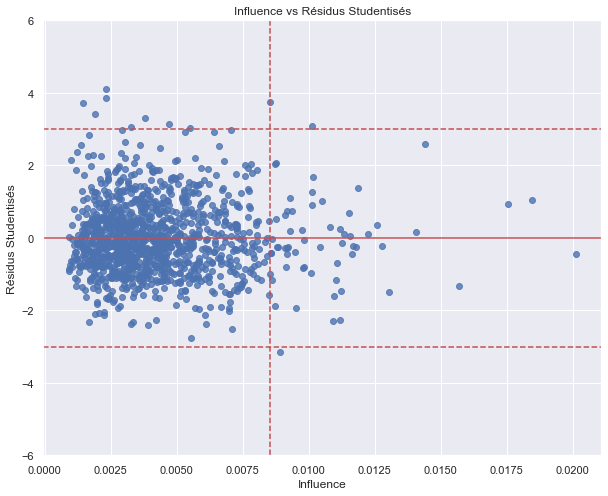

margin_low  dfb_Intercept  dfb_height_left  dfb_height_right  \
893         3.66      -0.027288         0.053897          0.004381   
1071        4.82       0.001047        -0.001236         -0.000175   
260         4.64       0.028461        -0.025663         -0.010415   
1097        5.11      -0.004711         0.008775          0.002694   
1224        5.59      -0.049165         0.043658          0.015327   

      dfb_margin_up  dfb_length   cooks_d  standard_resid  leverage  \
893       -0.059469   -0.032932  0.001456       -1.042213  0.006660   
1071       0.001399   -0.000530  0.000001        0.052699  0.002396   
260       -0.078521   -0.008735  0.002587        1.638291  0.004797   
1097      -0.009778   -0.008628  0.000060        0.268800  0.004148   
1224       0.060872    0.030540  0.001771        1.231504  0.005805   

      dffits_internal  student_resid    dffits  
893         -0.085336      -1.042252 -0.085339  
1071         0.002583       0.052676  0.002581  
260          0.113737       1.639478  0.113819  
1097         0.017347       0.268693  0.017340  
1224         0.094099       1.231778  0.094120

In [59]:
# Observations atypiques:
student_resid = reg_multi.get_influence().resid_studentized_external
(cooks, p_val_cooks) = reg_multi.get_influence().cooks_distance
(dffits, p_val_dffits) = reg_multi.get_influence().dffits
leverage = reg_multi.get_influence().hat_matrix_diag

# Graphique:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(leverage, student_resid, fit_reg=False, ax=ax)
ax.set_title("Influence vs Résidus Studentisés")
ax.set_xlabel("Influence")
ax.set_ylabel("Résidus Studentisés")
ax.set_ylim(-6, 6)
ax.axhline(y=0, color='r', linestyle='-')
ax.axhline(y=3, color='r', linestyle='--')
ax.axhline(y=-3, color='r', linestyle='--')
ax.axvline(x=2*np.mean(leverage), color='r', linestyle='--')

# Identifier les observations ayant une influence importante
influence_threshold = 2 * ((4+1)/len(train_df))**(1/2) # calcul du seuil
idx = np.where(leverage > influence_threshold)[0] # indices des observations ayant une influence importante
for i in idx:
    ax.annotate(i, xy=(leverage[i], student_resid[i]))

plt.show()

# Creation d'un dataframe de travail:
influence_metrics_df = pd.concat([train_df["margin_low"], reg_multi.get_influence().summary_frame()], axis = 1)
influence_metrics_df = influence_metrics_df.rename(columns={"hat_diag": "leverage"})#leviers                                               
influence_metrics_df.head()


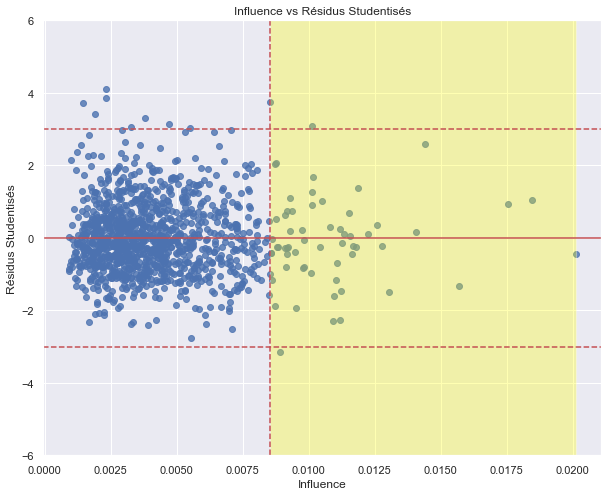

In [60]:
# Observations atypiques:
student_resid = reg_multi.get_influence().resid_studentized_external
(cooks, p_val_cooks) = reg_multi.get_influence().cooks_distance
(dffits, p_val_dffits) = reg_multi.get_influence().dffits
leverage = reg_multi.get_influence().hat_matrix_diag

# Graphique:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(leverage, student_resid, fit_reg=False, ax=ax)
ax.set_title("Influence vs Résidus Studentisés")
ax.set_xlabel("Influence")
ax.set_ylabel("Résidus Studentisés")
ax.set_ylim(-6, 6)
ax.axhline(y=0, color='r', linestyle='-')
ax.axhline(y=3, color='r', linestyle='--')
ax.axhline(y=-3, color='r', linestyle='--')
ax.axvline(x=2*np.mean(leverage), color='r', linestyle='--')

# Identifier les observations ayant une influence importante
influence_threshold = 2 * ((4+1)/len(train_df))**(1/2) # calcul du seuil
idx = np.where(leverage > influence_threshold)[0] # indices des observations ayant une influence importante
for i in idx:
    ax.annotate(i, xy=(leverage[i], student_resid[i]))

# Colorer la zone d'influence en jaune
from matplotlib.patches import Polygon
verts = [(2*np.mean(leverage), -6), (max(leverage), -6), (max(leverage), 6), (2*np.mean(leverage), 6)]
poly = Polygon(verts, facecolor='yellow', alpha=0.3)
ax.add_patch(poly)

plt.show()


In [61]:
influence_metrics_df.shape

(1170, 12)

Les trois barres horizontales représentent les seuils de valeurs de Cook, c'est-à-dire les valeurs à partir desquelles une observation peut être considérée comme ayant une influence importante sur la régression. La barre verticale représente la valeur de l'observation pour laquelle le résidu est le plus grand. Les observations situées au-dessus des seuils de Cook ou de la barre verticale peuvent être considérées comme des observations influentes ou des valeurs aberrantes qui peuvent affecter significativement les résultats de la régression.

In [62]:
# Calcul du nombre d'individus atypiques
std_res = influence_metrics_df.student_resid
print ("résidus studentisés:\n", std_res.describe())
outlier = pd.DataFrame((influence_metrics_df["margin_low"][abs(std_res) > 2]))
print(outlier.count())


résidus studentisés:
 count    1170.000000
mean        0.000214
std         1.001758
min        -3.139268
25%        -0.676692
50%        -0.109391
75%         0.571099
max         4.102765
Name: student_resid, dtype: float64
margin_low    55
dtype: int64


Nous avons 55 points atypiques qui doivent être retirés seulement s'ils sont influents

In [63]:
p = 4 #nombre de variables predictives                                       
n = 1170 #taille du df                                
levier = ((2*p)+2)/n #Seuil

print(influence_metrics_df["leverage"].describe())

hight_leverage = influence_metrics_df["margin_low"][abs(influence_metrics_df["leverage"]) > levier]
print("nombre d'individus à forte influence:", hight_leverage.count())


count    1170.000000
mean        0.004274
std         0.002372
min         0.000909
25%         0.002594
50%         0.003738
75%         0.005422
max         0.020118
Name: leverage, dtype: float64
nombre d'individus à forte influence: 60


Il y a 60 observations ayant une forte influence sur notre régression. il faut maintenant déterminer parmis ces 60
observations lesquelles sont des outliers

In [64]:
# Identification des individus atypiques a forte influence:
outliers = pd.merge(outlier, hight_leverage, left_index=True, right_index=True)
print(outliers.count())
print(outliers)


margin_low_x    7
margin_low_y    7
dtype: int64
      margin_low_x  margin_low_y
292           4.88          4.88
1199          4.49          4.49
664           5.04          5.04
1348          6.28          6.28
1329          3.82          3.82
1478          6.08          6.08
1074          4.36          4.36


Il y a 7 observations qui sont à la fois trés influentes et qui sont des outliers. 

On supprime ces observations 

In [65]:
# Suppression des  7 observations:
df_influ = train_df.drop(outliers.index)
df_influ.head()

diagonal  height_left  height_right  margin_up  length  margin_low
893     172.20       103.52        103.78       3.40  113.35        3.66
1071    171.50       103.90        103.98       3.40  112.07        4.82
260     172.27       103.71        103.64       2.67  113.63        4.64
1097    172.51       104.43        104.17       3.08  111.70        5.11
1224    171.74       104.52        104.23       3.61  112.14        5.59

In [66]:
df_influ.shape

(1163, 6)

on recommence la regression sans ces valeurs

In [67]:
#on regresse margin_low en fonction des autres variables
reg_multi_influ = smf.ols('margin_low~height_left+height_right+margin_up+length',
                    data=df_influ ).fit()
#on affiche les résultats pour évaluer le modèle avant de valider son utilisation
print(reg_multi_influ.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sat, 06 May 2023   Prob (F-statistic):          2.51e-159
Time:                        21:25:36   Log-Likelihood:                -803.02
No. Observations:                1163   AIC:                             1616.
Df Residuals:                    1158   BIC:                             1641.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8321      7.918      0.863   

In [68]:
# Calculer les résidus et les prédictions sur les données de training
y_pred_train_influ = reg_multi_influ.predict(df_influ [['height_left',
                                                        'height_right',
                                                        'margin_up',
                                                        'length']])
resid_train_influ = df_influ['margin_low'] - y_pred_train_influ

# Réaliser un test de Breusch-Pagan sur les résidus
bp_train = sm.stats.diagnostic.het_breuschpagan(resid_train_influ, df_influ[['height_left',
                                                                             'height_right',
                                                                             'margin_up',
                                                                             'length']])

# Afficher les résultats du test
print(f"p-value du test de Breusch-Pagan: {bp_train[1]:.4f}")
print(f"Statistique du test de Breusch-Pagan: {bp_train[0]:.4f}")
if bp_train[1] < 0.05:
    print("Les résidus ne sont pas homoscédastiques.")
else:
    print("Les résidus sont homoscédastiques.")


p-value du test de Breusch-Pagan: 0.0000
Statistique du test de Breusch-Pagan: 354.7929
Les résidus ne sont pas homoscédastiques.


La suppression des valeurs influentes n'a eu non d'influence sur l'Homoscédasticité des résidus.Lorsque la régression linéaire est utilisée pour ajuster des données hétéroscédastiques, les estimations de la pente et de l'ordonnée à l'origine peuvent être biaisées et les intervalles de confiance pour ces estimations peuvent être incorrects.

* Evaluation de l'heteroscedasticité

* On calcule la moyenne des valeurs absolues des résidus et compare cette moyenne avec deux fois l'écart-type des résidus. Si la moyenne est supérieure à deux fois l'écart-type, cela signifie que les résidus ne sont pas répartis de manière aléatoire et homogène

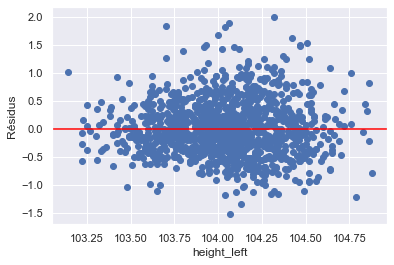

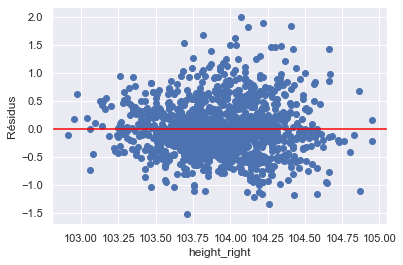

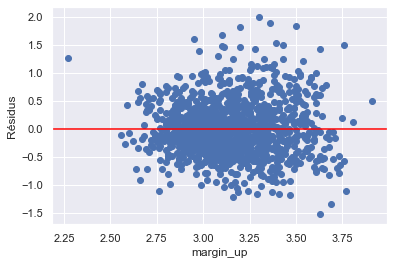

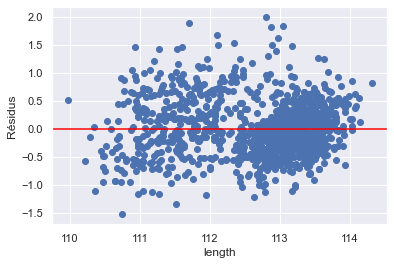

Les résidus sont répartis de manière aléatoire et homogène.


In [69]:
# Visualisation des résidus en fonction de height_left
plt.scatter(train_df['height_left'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('height_left')
plt.ylabel('Résidus')
plt.show()

# Visualisation des résidus en fonction de height_right
plt.scatter(train_df['height_right'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('height_right')
plt.ylabel('Résidus')
plt.show()

# Visualisation des résidus en fonction de margin_up
plt.scatter(train_df['margin_up'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('margin_up')
plt.ylabel('Résidus')
plt.show()

# Visualisation des résidus en fonction de length
plt.scatter(train_df['length'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('length')
plt.ylabel('Résidus')
plt.show()

# Détermination de la répartition des résidus
if (abs(reg_multi.resid)).mean() > 2*reg_multi.resid.std():
    print("Les résidus ne sont pas répartis de manière aléatoire et homogène.")
else:
    print("Les résidus sont répartis de manière aléatoire et homogène.")


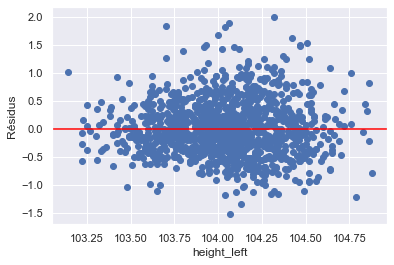

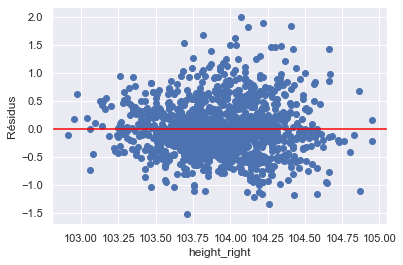

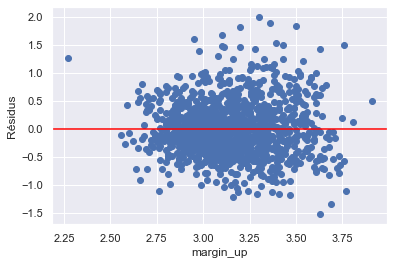

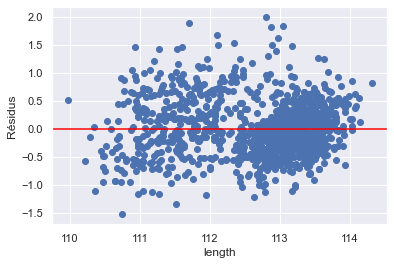

Les résidus sont répartis de manière aléatoire et homogène.
La moyenne des valeurs absolues des résidus est :  0.38088361446201763
L'écart-type des résidus est :  0.9818278339930332


In [70]:
# Visualisation des résidus en fonction de height_left
plt.scatter(train_df['height_left'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('height_left')
plt.ylabel('Résidus')
plt.show()

# Visualisation des résidus en fonction de height_right
plt.scatter(train_df['height_right'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('height_right')
plt.ylabel('Résidus')
plt.show()

# Visualisation des résidus en fonction de margin_up
plt.scatter(train_df['margin_up'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('margin_up')
plt.ylabel('Résidus')
plt.show()

# Visualisation des résidus en fonction de length
plt.scatter(train_df['length'], reg_multi.resid)
plt.axhline(y=0, color='red')
plt.xlabel('length')
plt.ylabel('Résidus')
plt.show()

# Détermination de la répartition des résidus
mean_abs_resid = abs(reg_multi.resid).mean()
std_resid = reg_multi.resid.std()
if mean_abs_resid > 2 * std_resid:
    print("Les résidus ne sont pas répartis de manière aléatoire et homogène.")
else:
    print("Les résidus sont répartis de manière aléatoire et homogène.")
print("La moyenne des valeurs absolues des résidus est : ", mean_abs_resid)
print("L'écart-type des résidus est : ",  2 * std_resid)


Lorsque les résidus d'un modèle de régression linéaire sont répartis de manière aléatoire et homogène, cela signifie qu'ils ont une variance constante pour toutes les valeurs des variables indépendantes. Dans ce cas, la moyenne des résidus devrait être proche de zéro, et il n'y aurait pas de corrélation entre les valeurs prédites et les résidus.

Cependant, lorsque la variance des résidus n'est pas constante pour toutes les valeurs des variables indépendantes, cela s'appelle l'hétéroscédasticité. L'hétéroscédasticité peut rendre difficile l'interprétation des résultats de régression, car elle peut entraîner des estimations de coefficients biaisées et une baisse de la précision de l'estimation.

Ainsi, pour détecter l'hétéroscédasticité, une méthode courante est de vérifier si la moyenne des résidus est supérieure à 2 fois l'écart type des résidus. Si tel est le cas, cela peut indiquer une variance non constante des résidus et donc une hétéroscédasticité. Si la moyenne des résidus est proche de zéro et que l'écart type des résidus est relativement stable, cela suggère une répartition aléatoire et homogène des résidus.

l'heteroscedasticité peut avoir un impact sur la précision du modèle des prévisions du modèle car elle peut conduire à des erreurs de prédiction plus importantes pour certaines valeurs de la variable indépendante.
* Les coefficients de régression peuvent être affectés : L'hétéroscédasticité peut entraîner une perte de précision dans les estimations des coefficients de régression. Par conséquent, les coefficients de régression estimés peuvent être moins fiables dans le contexte de l'hétéroscédasticité. Il est donc important de considérer la fiabilité des coefficients de régression lorsqu'on interprète les résultats.

* Les intervalles de confiance peuvent être affectés : L'hétéroscédasticité peut également entraîner des intervalles de confiance plus larges pour les estimations des coefficients de régression. Cela signifie que la plage de valeurs plausibles pour les coefficients de régression est plus large, ce qui peut avoir des implications pour la signification statistique des résultats.

* Les tests d'hypothèses peuvent être affectés : En présence d'hétéroscédasticité, les tests d'hypothèses peuvent ne pas être fiables. Les tests t et les tests F, par exemple, peuvent donner des résultats biaisés et conduire à des erreurs. Il est donc important d'utiliser des tests robustes pour vérifier les hypothèses statistiques.

Nous disposons de plus de 30 observation et d'un échantillon assez grand , nous pouvons poursuivre avec l'utilisation de la regression en ayant de l'heteroscedasticité dans les résidus sachant qu'il n'y a pas de rupture dans la variance et que la distribution des résidus se rapproche d'une gaussienne et que les résidus sont distribues de manière aléatoire et homogène

## Imputation des valeurs manquantes

In [71]:
df_med=df.copy()

In [72]:
# Sélectionner les observations avec des valeurs manquantes dans la variable "margin_low"
missing_values = df[df['margin_low'].isnull()]

# Créer une variable X contenant les valeurs des variables explicatives pour ces observations
X_missing = missing_values[['height_left', 'height_right', 'margin_up', 'length']]

# Prédire les valeurs manquantes en utilisant le modèle ajusté
y_missing = reg_multi.predict(X_missing)

# Remplacer les valeurs manquantes par les prédictions
df_med.loc[df['margin_low'].isnull(), 'margin_low'] = y_missing


In [73]:
#on vérifie que cela a fonctionné.
df_med.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [74]:
df_med.shape

(1500, 7)

In [75]:
df_med.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

# **ACP**

## Exploration

In [76]:
#rappel du df
df_med.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [77]:
#verification valeurs manquantes
df_med.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [78]:
#Recherche de valeur(s) négative(s) 
display(df_med[df_med<0].count())

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

* **Test d'influence : Analyse de variance ANOVA selon authenticité des billets**

On cherche ici à étudier la dépendance/l'influence entre l'authenticité du billet (vrai/faux) avec les autres variables.

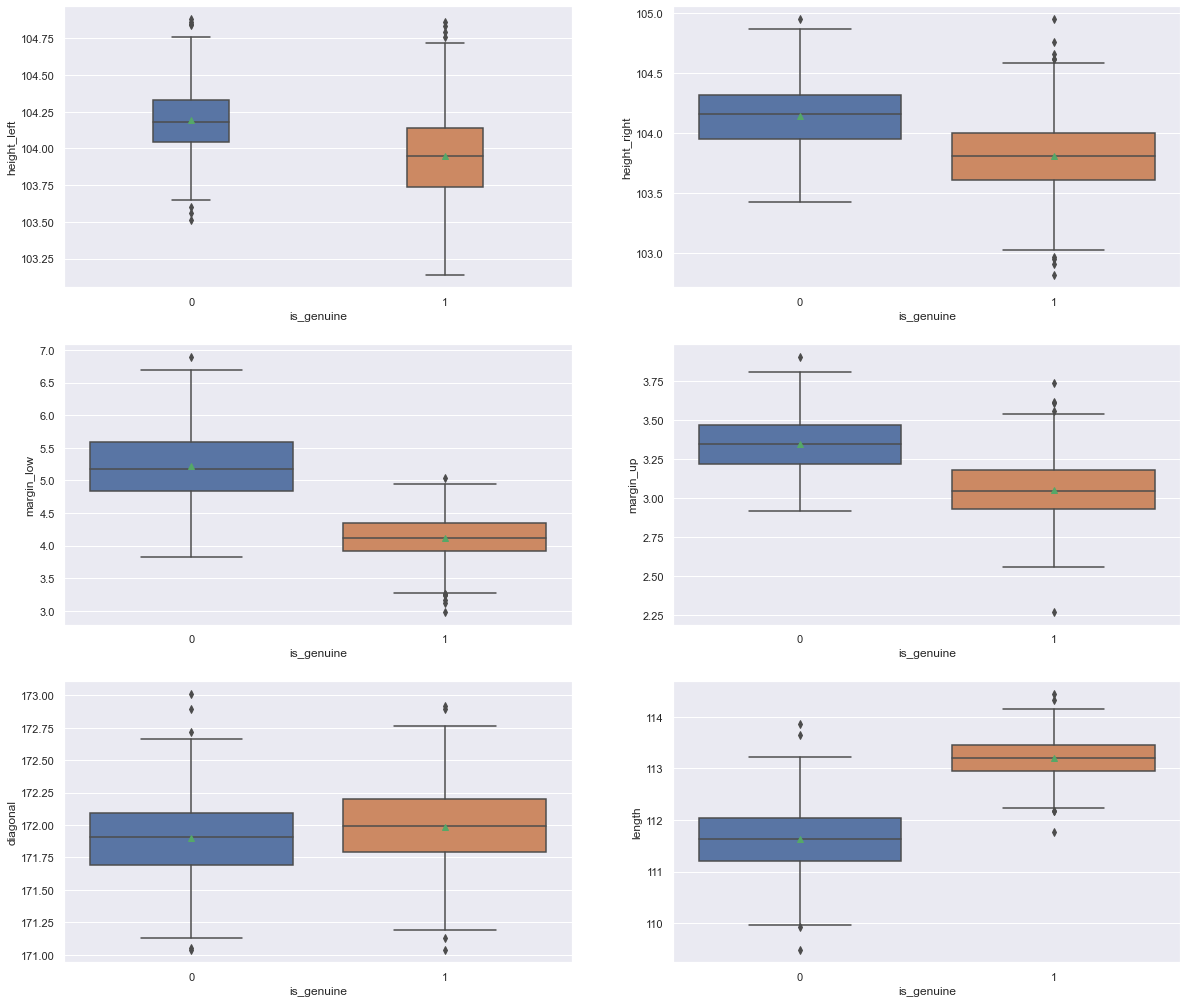

In [79]:
#outliers en fonction de l'authenticité du billet
plt.figure(figsize=(20, 30))

plt.subplot(521)
sns.boxplot(x='is_genuine', y='height_left', width=0.3, data=df_med, showmeans=True)
plt.subplot(522)
sns.boxplot(x='is_genuine', y='height_right', data=df_med, showmeans=True)
plt.subplot(523)
sns.boxplot(x='is_genuine', y='margin_low', data=df_med, showmeans=True)
plt.subplot(524)
sns.boxplot(x='is_genuine', y='margin_up', data=df_med, showmeans=True)
plt.subplot(525)
sns.boxplot(x='is_genuine', y='diagonal', data=df_med, showmeans=True)
plt.subplot(526)
sns.boxplot(x='is_genuine', y='length', data=df_med, showmeans=True)
   
plt.show()

* Rappel encodage : 0 = Faux billet, 1 = vrai billet

* On constate qu'il y a beaucoup plus d'outliers du côté des billets faux. hight_right, margin_up et margin_low semblent être les variables qui ont le moins d'outliers du côté "billet vrai"; ces 3 variables pourraient etre les plus fiables dans la vérification de l'authenticité d'un billet.

* Comme précédemment nous allons conserver les outliers car certains d'entre eux constituent de vrais billets.Nous ne les supprimerions pas avant la régression logistique puisque nous ne savons pas comment ils se comportent, il faudra cependant faire une étude des individus atypiques et influents.

* On constate également une différence de variance importante entre les vrais et les faux billets sauf pour la variable diagonal dans laquelle il a peu de différence.Ce qui semble cohérent car nous avons vu plus tôt que la variable diagonal ne semblait pas être corrélées ni aux autres variables ni à is_genuine.

* Il semblerait également que lenght et margin low soient les 2 variables les plus discriminantes pour détecter l'authenticité du billet. En effet il semblerait que plus le billet est court (lenght) plus il a de chance d'être faux et plus la marge basse est petite et plus le billet a de chance d'etre faux. On peut donc supposer que les faux billet seraient donc probablement caractérisés par une longueure plus courte que les autres et une marge basse plus importante que les autres. 

Pour savoir si ces écarts sont significatifs ou pas réalisons un test Anova et un test de ficher

In [80]:
variable=['length~is_genuine','diagonal~is_genuine','height_left~is_genuine',
          'height_right~is_genuine','margin_low~is_genuine','margin_up~is_genuine']
liste=[]
for a in variable:
    anova=smf.ols(a, data=df_med).fit()
    df1=pd.DataFrame(sm.stats.anova_lm(anova, typ=2))
    display(a,df1)  

'length~is_genuine'

sum_sq      df            F  PR(>F)
is_genuine  823.507935     1.0  3876.654138     0.0
Residual    318.216390  1498.0          NaN     NaN

'diagonal~is_genuine'

sum_sq      df          F        PR(>F)
is_genuine    2.460749     1.0  26.874763  2.466867e-07
Residual    137.162201  1498.0        NaN           NaN

'height_left~is_genuine'

sum_sq      df           F        PR(>F)
is_genuine   19.394088     1.0  252.558393  1.126916e-52
Residual    115.032185  1498.0         NaN           NaN

'height_right~is_genuine'

sum_sq      df           F        PR(>F)
is_genuine   37.401634     1.0  460.974212  2.270856e-89
Residual    121.541825  1498.0         NaN           NaN

'margin_low~is_genuine'

sum_sq      df            F         PR(>F)
is_genuine  400.063525     1.0  2378.837752  1.284081e-311
Residual    251.927715  1498.0          NaN            NaN

'margin_up~is_genuine'

sum_sq      df           F         PR(>F)
is_genuine  29.607294     1.0  870.581394  3.144530e-151
Residual    50.944950  1498.0         NaN            NaN

les p values étant < à 5% on peut rejeter H0, l'authenticité a bien un impact sur l'ensemble de nos variables dont la variable diagonale

* **Distribution des variables**

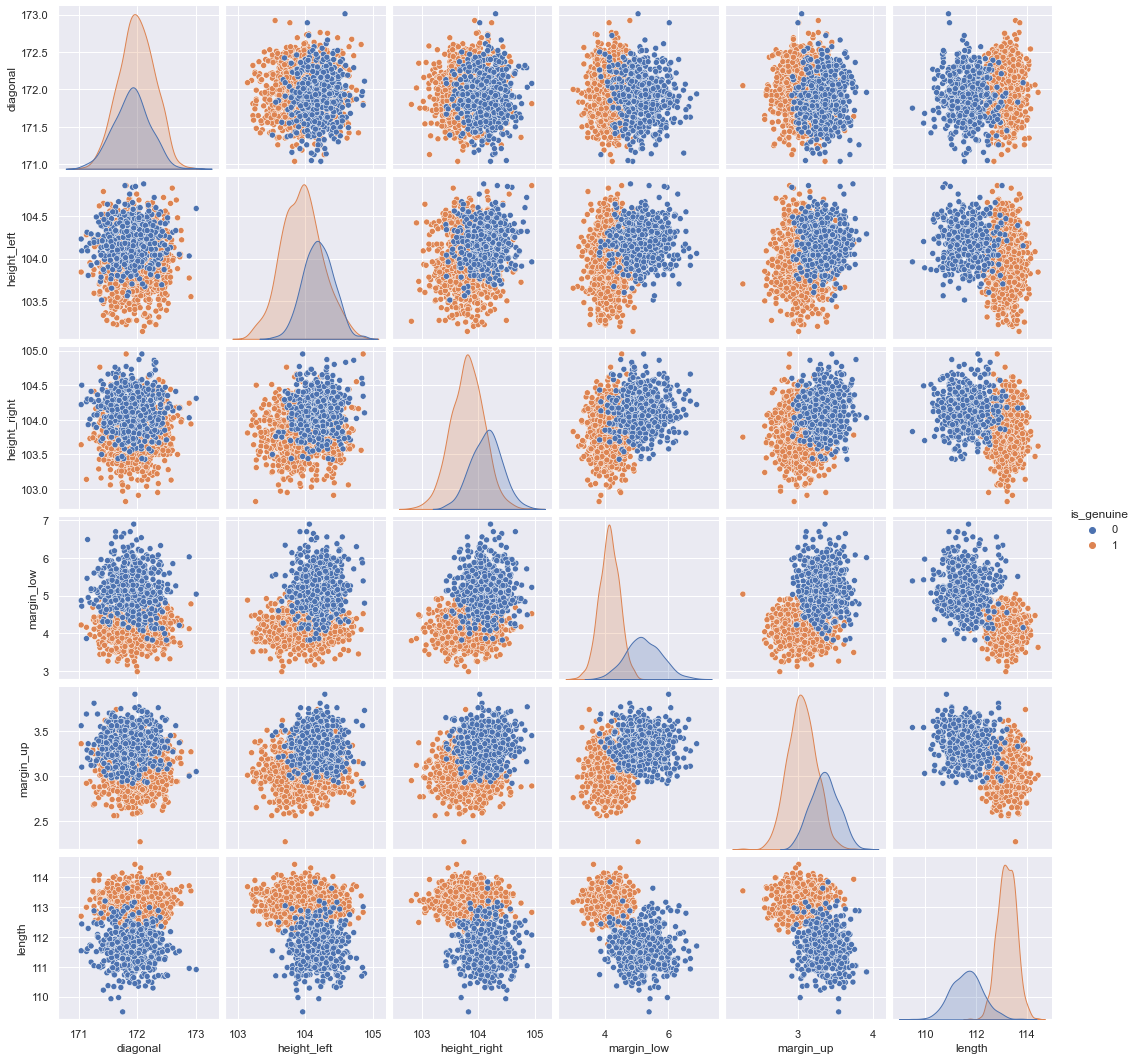

In [81]:
sns.pairplot(df_med, hue="is_genuine")

* **Matrice de corrélation**

In [82]:
spearmancorr = df_med.corr(method='spearman')

on retrouve une forte corrélation entre les variables:
 * is_geniune et lenght(0.79)/margin_low(-0.74) ce qui confirme ce que nous avons pu voir précédemment, ces 2 variables seraient celles qui ont le plus d'impact sur l'authenticité du billet.
 * margin_low et lenght sont également fortement corrélées (-0.58) c'est la plus forte corrélation entre variables sans is_geniune
 
Les autres variables sont également corrélées entre elles mais avec des coef inférieurs à 0.50

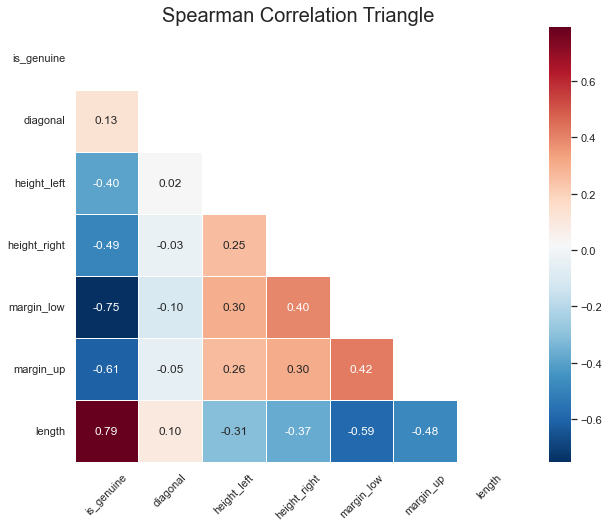

In [83]:
# Calcul de la corrélation de Spearman
spearmancorr = df.corr(method='spearman')

# Création d'une figure et d'un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Génération du triangle de corrélation 
mask = np.triu(np.ones_like(spearmancorr, dtype=bool))
sns.heatmap(spearmancorr, cmap='RdBu_r', mask=mask, annot=True, fmt='.2f', linewidths=.5, ax=ax, cbar_kws={'drawedges': False})
ax.set_facecolor('white')

# Définition des titres et des étiquettes des axes
ax.set_title('Spearman Correlation Triangle', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



## ACP

L'ACP (Analyse en Composantes Principales) est une technique de réduction de dimensionnalité qui peut être utile pour améliorer les performances d'un algorithme de classification comme K-means.

En effet, si le nombre de variables explicatives (ici, les colonnes margin_low, margin_up, high left, high right, diagonal) est élevé, cela peut rendre la classification plus difficile en raison de la malédiction de la dimensionnalité. L'ACP permet de réduire le nombre de variables en transformant les données originales en un ensemble de nouvelles variables non corrélées (appelées composantes principales) qui capturent la plupart de la variance des données d'origine.

En utilisant l'ACP avant K-means, on peut donc réduire le nombre de variables utilisées pour la classification et ainsi améliorer les performances de l'algorithme. Cela peut également permettre de mieux visualiser les données en les projetant sur un espace de dimensions réduites.

L'ACP permettra également de vérifier où se situent les vrais et faux billets dans l'espace et comment les composantes principales impactent l'authenticité des billets .

### Préparation des données

#### Split et normalisation

In [84]:
# Séparation des données en train/test
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_med.drop('is_genuine', axis=1), df_med['is_genuine'],
                                                        test_size=0.20, random_state=42)

# Standardisation des données d'entraînement
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)

# Application de la même transformation aux données de test
X_test_scaled1 = scaler.transform(X_test1)

# Calcul de la moyenne et de l'écart type pour les données d'entraînement
idx = ['mean', 'std']
df_train_stats = pd.DataFrame(X_train_scaled1).describe().loc[idx, :]

# Renommer les colonnes
new_column_names = {i: col_name for i, col_name in enumerate(X_train1.columns)}
df_train_stats.rename(columns=new_column_names, inplace=True)

# Affichage des statistiques pour les données d'entraînement
print("Statistiques pour les données d'entraînement:")
print(df_train_stats.round(2))

# Calcul de la moyenne et de l'écart type pour les données de test
df_test_stats = pd.DataFrame(X_test_scaled1).describe().loc[idx, :]

# Renommer les colonnes
new_column_names = {i: col_name for i, col_name in enumerate(X_test.columns)}
df_test_stats.rename(columns=new_column_names, inplace=True)

# Affichage des statistiques pour les données de test
print("Statistiques pour les données de test:")
print(df_test_stats.round(2))


Statistiques pour les données d'entraînement:
      diagonal  height_left  height_right  margin_low  margin_up  length
mean       0.0         -0.0           0.0        -0.0        0.0    -0.0
std        1.0          1.0           1.0         1.0        1.0     1.0
Statistiques pour les données de test:
      diagonal  height_left  height_right  margin_up  length     5
mean      0.02        -0.01          0.01       0.08    0.01 -0.07
std       0.96         0.97          0.99       1.01    1.00  0.96


Nos données sont bien divisées et normalisées.

### PCA et Diagramme eboulis

In [85]:
#Instancier et transformer 
pca = decomposition.PCA()
pca.fit(X_train_scaled1)
scree = pca.explained_variance_ratio_*100

Variance expliquée par les 2 premières composantes : 60.02%
Variance expliquée par les composantes f3 + f4 : 25.03%
Variance expliquée par les 4 premières composantes : 85.04%


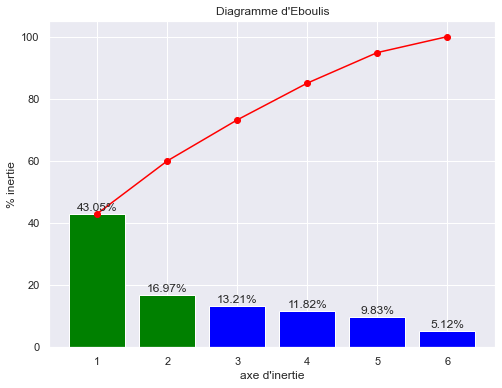

In [86]:
#diagramme Eboulis
plt.figure(figsize=(8, 6))

# Affichage des variances expliquées pour les 2 premières composantes
plt.text(1, scree[0] + 1, '{:.2f}%'.format(scree[0]), ha='center')
plt.text(2, scree[1] + 1, '{:.2f}%'.format(scree[1]), ha='center')

# Affichage des variances expliquées pour les 2 suivantes composantes
plt.text(3, scree[2] + 1, '{:.2f}%'.format(scree[2]), ha='center')
plt.text(4, scree[3] + 1, '{:.2f}%'.format(scree[3]), ha='center')
# Affichage des variances expliquées pour les 2 dernières composantes
plt.text(5, scree[4] + 1, '{:.2f}%'.format(scree[4]), ha='center')
plt.text(6, scree[5] + 1, '{:.2f}%'.format(scree[5]), ha='center')

# Affichage de la variance expliquée pour les 2 premières composantes et les 2 suivantes
print(f"Variance expliquée par les 2 premières composantes : {scree[:2].sum():.2f}%")
print(f"Variance expliquée par les composantes f3 + f4 : {(scree[2]+scree[3]):.2f}%")
print(f"Variance expliquée par les 4 premières composantes : {scree[:4].sum():.2f}%")



# Coloration en bleu des barres pour les composantes 3,4,5 et 6
bar_colors = ['green', 'green', 'blue', 'blue', 'blue', 'blue']
plt.bar(np.arange(len(scree))+1, scree, color=bar_colors)

plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')

plt.xlabel("axe d'inertie")
plt.ylabel("% inertie")

plt.title("Diagramme d'Eboulis")

plt.show(block=False)

Les 2 premières composantes expliquent environs 60% de la variance quand f3+f4 n'expliquent que 25% de la variance nous allons donc utiliser les 2 premieres composantes pour etudier nos variables , projeter nos observations et nos clusters après application du kmeans.F3+F4 ne représente que 25% de la variance la projection des observations sur ce cercle n'est pas optimal car la variance est trop faible.

###  Heatmap des composantes

Text(0.5, 1.0, 'Heatmap des relations entre les variables et les 2 composantes principales')

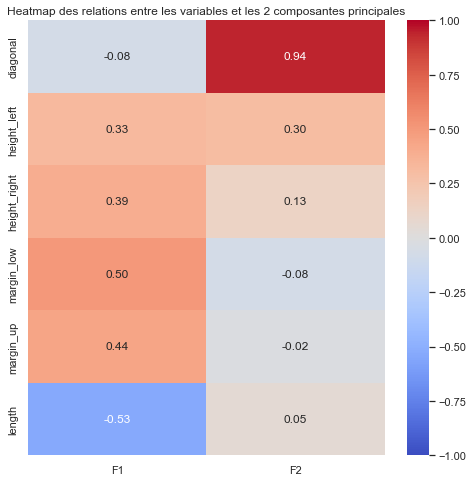

In [87]:
n_components = 2
pca = PCA(n_components=n_components).fit(X_train_scaled1)
pcs = pd.DataFrame(pca.components_, index=[f"F{i}" for i in range(1, n_components+1)], columns=X_train1.columns)
pcs.T.round(2)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
ax.set_title('Heatmap des relations entre les variables et les 2 composantes principales')


* **Sur F1 les variables les mieux représentées sont:**
    * diagonal
    
* **Sur F2 les variables les mieux représentées de façon décroissante sont:**
    * lenght
    * margin_low
    * margin_up
    * height_left
    * height_right
    
De façon synthétique on peut dire que F1 représente la variable diagonal et F2 toutes les autres variables sauf diagonal

### Cercle de corrélation

Le cercle de corrélation permet de représenter les relations entre les variables et les composantes principales.

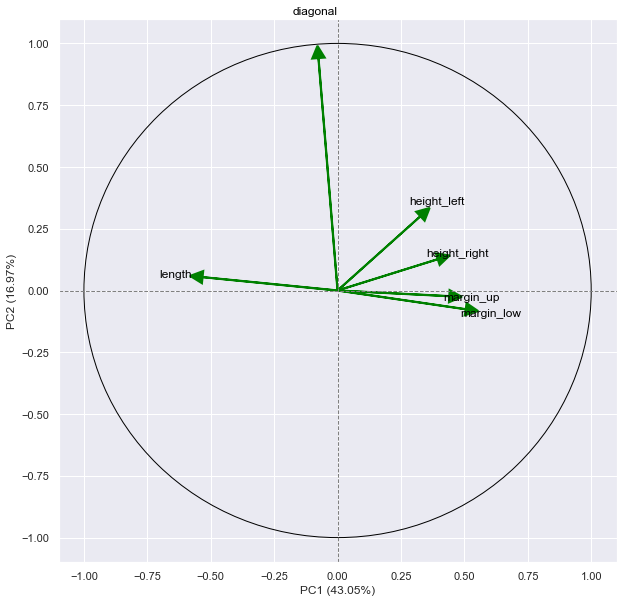

In [88]:
# Calcul des coordonnées des variables sur les axes factoriels
pcs = pca.components_
coeff = np.transpose(pcs[:2, :])  # Les deux premiers axes factoriels
n_var = coeff.shape[0]
cols = ['PC{}'.format(i) for i in range(1, 3)]
coef_df = pd.DataFrame(coeff, index=X_train1.columns, columns=cols)

# Calcul des cercles de corrélation
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.set_xlim(-1.1, 1.1)  # Limiter le cercle au carré
ax.set_ylim(-1.1, 1.1)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)
ax.set_xlabel('PC1 ({:.2f}%)'.format(scree[0]))
ax.set_ylabel('PC2 ({:.2f}%)'.format(scree[1]))

for i in range(n_var):
    x = coeff[i, 0]
    y = coeff[i, 1]
    ax.arrow(0, 0, x, y, color='green', head_width=0.05, head_length=0.05, linewidth=2)  # Flèches plus épaisses et vertes
    ax.text(x*1.2, y*1.2, X_train1.columns[i], color='black', ha='center', va='center')
plt.show()

On projette ensuite nos observations sur le 1er plan factoriel

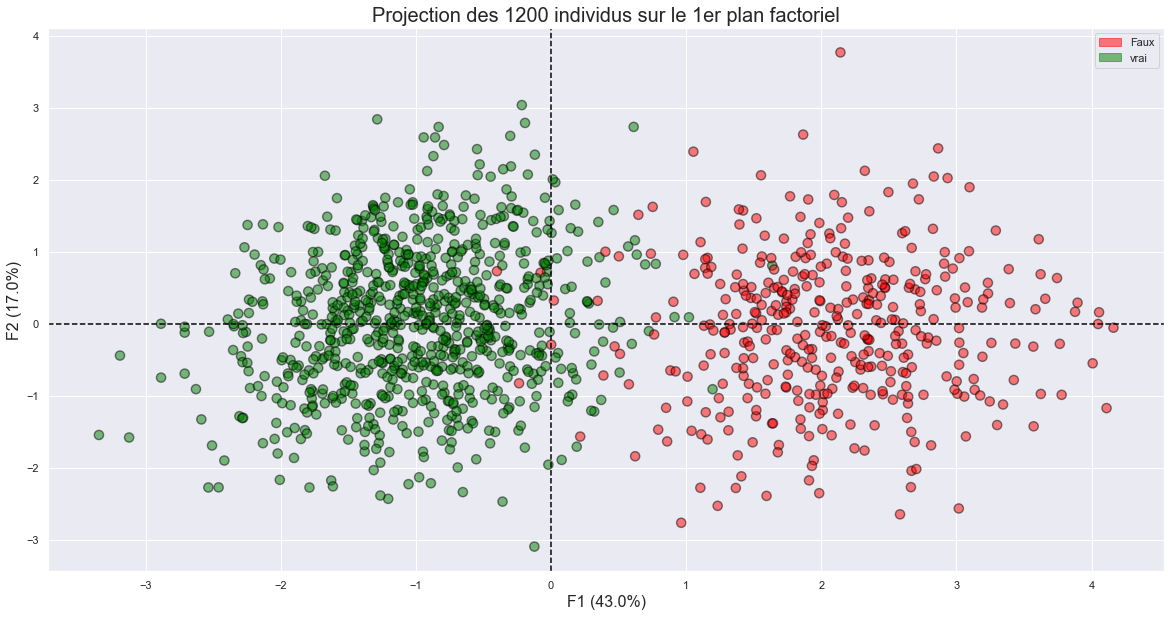

In [89]:
#Coordonnées factorielles 
X_projected = pca.transform(X_train_scaled1)
plt.figure(figsize=(20, 10))

#Projection des individus par scatter Plot sur le premier plan factoriel
colors = ['red', 'green']
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_train1.apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

#Labels de la nature des billets
lab_0 = mpatches.Patch(color='red', alpha=0.5, label='Faux')
lab_1 = mpatches.Patch(color='green', alpha=0.5, label='vrai')
plt.legend(handles=[lab_0, lab_1])
plt.axvline(x=0, linestyle='--', color='black')
plt.axhline(y=0, linestyle='--', color='black')
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=16)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=16)
plt.title("Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]), fontsize=20)

plt.show()

On projette nos observations sur le cercle de corrélation

Nombre d'individus représentés : 1200


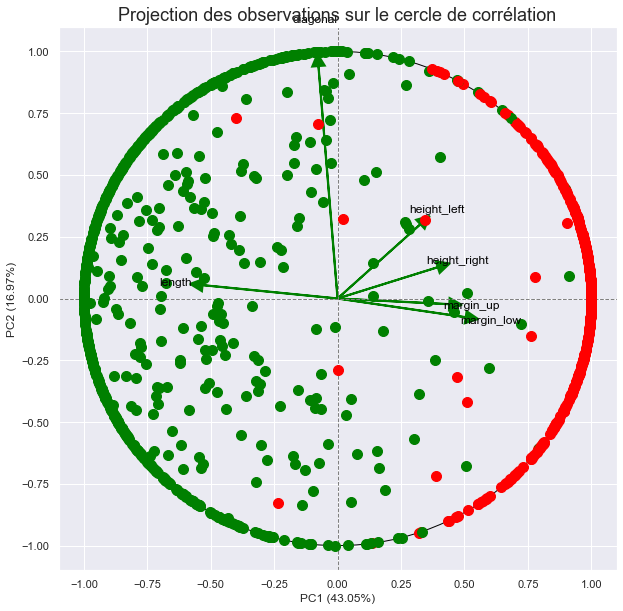

In [90]:
# Projet des individus sur le cercle de corrélation
obs_projected = X_train_scaled1.dot(pca.components_.T[:,:2])

# Affichage des points projetés sur le cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.set_xlim(-1.1, 1.1)  # Limiter le cercle au carré
ax.set_ylim(-1.1, 1.1)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('PC1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
ax.set_ylabel('PC2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
for i in range(n_var):
    x = coeff[i, 0]
    y = coeff[i, 1]
    ax.arrow(0, 0, x, y, color='green', head_width=0.05, head_length=0.05, linewidth=2)  # Flèches plus épaisses et vertes
    ax.text(x*1.2, y*1.2, X_train1.columns[i], color='black', ha='center', va='center')

    
for i in range(X_train_scaled1.shape[0]):
    x = obs_projected[i, 0]
    y = obs_projected[i, 1]
    radius = np.sqrt(x**2 + y**2)
    if radius <= 1:
        ax.plot(x, y, marker='o', color=colors[y_train1.iloc[i]], markersize=10)
      
    else:
        ax.plot(x/radius, y/radius, marker='o', color=colors[y_train1.iloc[i]], markersize=10)
      
n_individus = X_train_scaled1.shape[0]
print("Nombre d'individus représentés :", n_individus)
plt.title('Projection des observations sur le cercle de corrélation', fontsize=18)
plt.show()

#####  <ins>**Interprétation**</ins>

* Le cercle de corrélation confirme les points vu précédemment dans la heatmap
* la projection des individus sur les 2 premières composantes semblent indiquer que :
    * les billets vrais sont plutot situés à gauche donc cela suppose que plus les billets ont une longueur marge et hauteur faible plus il a de chance d'être vrai.
    * A contrario les billets faux sont plutot sur la droite donc lorsque les billets sont long avec des marges et des hauteurs plus longue
    * L'axe F1 serait donc l'axe qui permette de séparer les billets vrai des billets faux
    * La variable diagonal semble impacter assez faiblement l'authenticité du billet.
* On pourrait tracer une diagonal pour scinder les groupes en 2 mais avec quelques points qui s'entremèlent ce qui pourrait supposer que certains billets sortent du cadre classique d'authentification selon les mesures (peut être des billets abimés)ou alors éventuellement des erreurs d'étiquetage.

Nous allons maintenant effectuer le clustering K-means à partir des composantes principales obtenues à partir de l'ACP. Cela permet d'effectuer le clustering dans un espace de dimensions réduites et de conserver uniquement les variables les plus pertinentes pour la classification. De plus, les composantes principales sont non corrélées et de variance croissante, ce qui peut faciliter la distinction des clusters.

# **CONSTRUCTION DES MODELES DE PREDICTION**

## **K_means**

Prédiction de classe avec l'algorithme Kmeans

### Nombre de cluster optimal

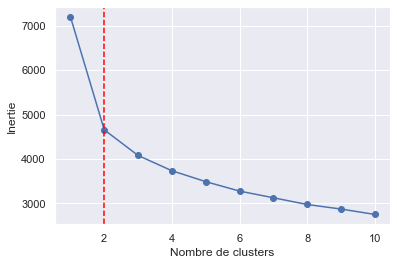

In [91]:
# Déterminer le nombre de clusters à utiliser
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled1)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")

# Ajouter la ligne verticale pour couper le 1er coude
plt.axvline(x=2, color='red', linestyle='--')

plt.show()

Nous voyons ici un coude qui se forme pour k = 2 

### Prediction kmeans

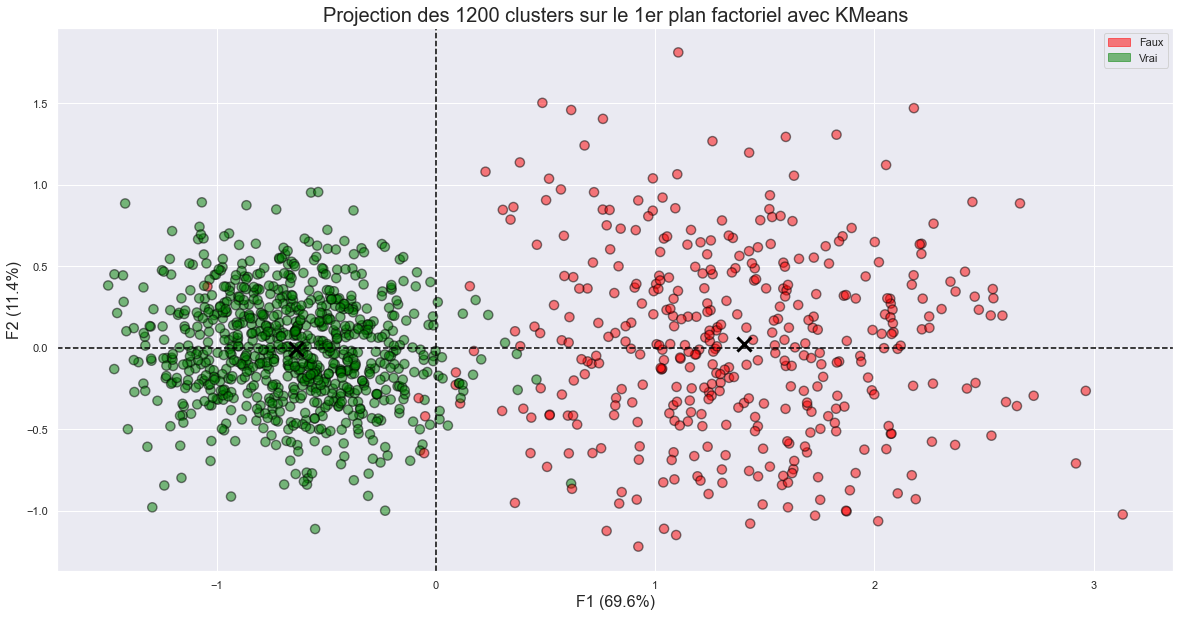

In [92]:
# Appliquer l'ACP sur les données
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_train1)

# Appliquer l'algorithme KMeans avec le nombre de clusters optimal déterminé
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_projected)

# Afficher la projection des individus avec les clusters et les centroïdes
colors = ['red', 'green']
plt.figure(figsize=(20, 10))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_train1.apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black', s=200, linewidths=3)

lab_0 = mpatches.Patch(color='red', alpha=0.5, label='Faux')
lab_1 = mpatches.Patch(color='green', alpha=0.5, label='Vrai')
plt.legend(handles=[lab_0, lab_1])

plt.axvline(x=0, linestyle='--', color='black')
plt.axhline(y=0, linestyle='--', color='black')
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=16)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=16)
plt.title("Projection des {} clusters sur le 1er plan factoriel avec KMeans".format(X_projected.shape[0]), fontsize=20)

plt.show()


* On constate que les 2 clusters sont bien identifiés avec une répartition des vrais billets à gauche et des faux billets à droite
* Les centroïdes sont alignés sur l'axe des abscisses et éagelemnt réaprtis à droite et a gauche, ce qui confirme que les variables longueurs ainsi que les marges et les hautes du billets influents sur l'authenticité des billets et confirme que plus un billet est court plus il a de chance d'etre vrai
* On constate également un léger décalage des centroïde au niveau de l'ordonnée donc en fonction de la variable diagonale. Les vrai billets auraient donc une diagonale légèrement plus petite que les faux billets d'après le clustering
* on constate que certains points s'entremêlent il peut s'agir soit de :
    * une erreur de classification du kmeans
    * de billets abimés ( exemple billets déchirés, froissés, recollés ce qui impacterait les mesures)
    * une erreur d'étiquetage au départ dans l'identification de l'authenticité

* **Matrice de confusion données de training**

Ajoutons à notre dataframe la colonne cluster avec ses labels

In [93]:
df_kMeans = pd.concat([y_train1,X_train1], axis=1)
print(df_kMeans.head())
print(df_kMeans.shape)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
382            1    172.28       104.62        103.80        4.08       3.08   
538            1    171.90       104.50        103.49        4.08       2.82   
1493           0    171.63       104.33        104.61        4.88       3.35   
1112           0    172.06       104.28        104.31        5.61       3.27   
324            1    172.10       104.42        103.60        4.18       2.89   

      length  
382   113.26  
538   113.50  
1493  112.16  
1112  111.61  
324   113.32  
(1200, 7)


In [94]:
# Appliquer l'ACP sur les données
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_train1)

# Appliquer l'algorithme KMeans avec le nombre de clusters optimal déterminé
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_projected)

# Inverser les labels de cluster pour correspondre aux billets faux (0) et vrais (1)
labels = np.where(kmeans.labels_ == 0, 1, 0)

# Ajouter une colonne "cluster" au dataframe initial avec les étiquettes de cluster inversées
df_kMeans = X_train1.copy()
df_kMeans['is_genuine'] = y_train1
df_kMeans['cluster'] = labels

# Afficher le dataframe avec la colonne "cluster"
df_kMeans


diagonal  height_left  height_right  margin_low  margin_up  length  \
382     172.28       104.62        103.80    4.080000       3.08  113.26   
538     171.90       104.50        103.49    4.080000       2.82  113.50   
1493    171.63       104.33        104.61    4.880000       3.35  112.16   
1112    172.06       104.28        104.31    5.610000       3.27  111.61   
324     172.10       104.42        103.60    4.180000       2.89  113.32   
361     172.19       104.09        103.82    3.820000       3.04  113.13   
1487    171.30       104.49        103.89    4.880000       3.17  111.51   
1029    171.96       104.29        104.03    6.010000       3.91  110.83   
707     172.48       104.56        104.03    3.790000       2.97  113.65   
332     171.95       103.44        103.80    4.080000       3.19  112.43   
429     172.09       103.78        104.22    4.160000       3.18  113.30   
1242    171.58       104.23        104.50    5.140000       3.70  111.75   
425     171.91       103.97        103.98    4.230000       3.01  112.98   
628     171.44       103.52        103.49    4.090000       3.12  113.23   
1111    172.03       104.52        103.96    4.300000       3.48  112.16   
677     172.05       103.90        103.76    4.520000       2.71  113.42   
693     172.00       104.32        104.26    4.530000       3.04  112.93   
757     172.44       104.06        103.79    4.280000       3.16  113.31   
254     172.17       104.21        103.87    4.350000       2.98  113.66   
1094    172.13       104.40        103.43    4.440000       3.65  111.17   
916     171.64       103.90        104.07    3.600000       3.39  113.18   
1185    171.38       104.39        104.56    5.960000       3.25  111.59   
668     171.96       103.51        103.75    4.060000       3.33  113.53   
841     172.36       103.92        103.08    3.690000       3.10  112.88   
806     171.91       103.99        103.76    3.620000       3.04  113.00   
1456    172.48       104.41        104.47    4.810000       3.62  111.31   
86      172.01       104.58        103.89    3.960000       2.87  113.28   
1421    172.24       104.11        103.55    5.020000       3.63  111.33   
265     172.15       104.02        103.94    3.960000       2.87  112.38   
287     171.92       104.12        104.15    3.830000       2.88  112.65   
1483    172.08       104.16        104.58    4.790000       3.72  111.04   
892     172.63       104.13        104.17    3.770000       3.45  113.34   
1495    171.75       104.38        104.17    4.420000       3.09  111.28   
978     172.43       103.65        104.30    4.090000       2.94  113.06   
534     171.76       104.04        103.88    4.180000       3.21  113.15   
1000    172.28       103.95        103.91    4.780000       3.31  111.40   
221     172.04       103.67        103.60    4.090000       3.14  112.99   
113     171.82       104.23        104.05    4.210000       3.20  112.89   
672     172.19       104.61        103.69    4.000000       3.26  112.91   
583     171.68       103.84        103.98    3.520000       3.01  113.45   
174     171.55       104.40        103.17    4.540000       2.83  113.30   
535     171.68       104.18        103.89    4.400000       3.33  113.21   
1078    172.21       104.40        104.28    5.280000       3.42  112.99   
1176    171.59       104.05        103.94    5.007983       3.02  111.29   
1106    172.08       103.95        103.90    5.450000       3.29  112.03   
982     171.43       104.52        103.42    4.050000       2.82  113.02   
285     172.27       103.78        103.86    4.250000       2.86  112.73   
867     172.12       104.32        103.19    4.040000       3.28  113.11   
374     172.07       104.49        103.52    4.240000       3.00  113.06   
1196    171.94       104.04        104.27    4.750000       3.16  111.61   
31      171.98       104.33        103.61    3.680000       3.14  113.41   
551     171.56       103.44        104.09    4.410000 

on constate au premier abord en observant le dataframe que l'identification des clusters semble identique à celle de la variable is_genuine. On vérifie que la prédiction est bonne avec la matrice de confusion

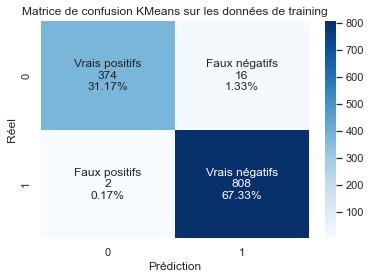

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       390
           1       0.98      1.00      0.99       810

    accuracy                           0.98      1200
   macro avg       0.99      0.98      0.98      1200
weighted avg       0.99      0.98      0.98      1200



In [95]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(df_kMeans['is_genuine'], df_kMeans['cluster'])

# Définir les noms de groupe et les étiquettes pour la heatmap
group_names = ['Vrais positifs', 'Faux négatifs', 'Faux positifs', 'Vrais négatifs']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Afficher la heatmap de la matrice de confusion
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Matrice de confusion KMeans sur les données de training")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# Afficher les métriques de classification
classification = classification_report(df_kMeans['is_genuine'], df_kMeans['cluster'])
print(classification)

* **Matrice de confusion données de test**

In [96]:
# Appliquer l'ACP sur les données de test
pca = PCA(n_components=2)
X_projected_test = pca.fit_transform(X_test1)

# Appliquer l'algorithme KMeans avec le nombre de clusters optimal déterminé
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_projected_test)

# Ajouter une colonne "cluster" au dataframe initial avec les étiquettes de cluster
df_kMeans_test = X_test1.copy()
df_kMeans_test['is_genuine'] = y_test1
df_kMeans_test['cluster'] = kmeans.labels_

# Afficher le dataframe avec la colonne "cluster"
df_kMeans_test


diagonal  height_left  height_right  margin_low  margin_up  length  \
1116    172.26       103.90        104.12    4.990000       3.42  111.27   
1368    171.65       104.32        104.38    5.650000       3.24  112.30   
422     171.53       103.53        103.63    4.040000       2.96  112.76   
413     172.30       103.66        103.50    4.209212       3.16  112.95   
451     172.17       103.79        103.54    4.070000       2.78  113.03   
861     171.86       104.21        103.74    4.430000       2.90  113.65   
1063    171.44       103.99        104.04    4.810000       3.49  111.74   
741     172.17       103.75        103.29    4.430000       2.88  113.38   
1272    171.73       103.74        104.38    5.140000       3.16  111.73   
259     172.35       103.62        103.78    4.380000       2.86  113.28   
888     172.15       104.28        103.67    4.280000       3.24  113.35   
1432    171.96       103.92        104.23    5.000000       3.35  111.16   
712     172.09       103.68        103.99    3.740000       3.28  113.27   
1382    171.97       104.85        104.52    5.870000       3.56  110.98   
70      171.81       103.84        103.66    4.350000       2.93  112.97   
1268    171.94       104.38        103.81    4.870000       3.39  111.22   
1491    171.79       104.18        104.54    5.130000       3.51  112.40   
607     171.91       104.17        103.62    4.010000       2.89  112.73   
433     171.71       103.71        103.36    4.100000       3.17  113.07   
51      172.03       103.59        104.09    4.490000       2.85  113.44   
1199    172.03       104.32        104.87    4.490000       3.77  111.04   
1128    172.37       104.25        103.67    5.120000       3.30  112.03   
1190    171.45       104.21        104.18    4.550000       3.52  113.21   
1249    171.45       104.03        104.26    4.880000       3.44  111.92   
1419    172.13       104.33        103.69    4.750000       3.08  110.75   
432     171.47       104.46        104.30    4.120000       3.06  113.59   
1452    171.93       104.15        103.98    4.570000       3.57  112.71   
1470    171.49       104.42        104.40    5.080000       3.36  111.45   
1234    171.95       104.00        103.88    5.800000       2.96  111.79   
1281    171.62       104.53        103.64    4.890000       3.16  112.54   
1085    171.39       103.51        103.50    5.520000       3.45  111.54   
610     171.80       103.71        103.67    4.480000       3.18  112.76   
1284    172.10       104.16        104.34    6.000000       3.09  111.62   
1041    171.77       104.12        104.42    6.650000       3.63  111.53   
220     171.26       103.59        103.80    4.110000       3.25  113.03   
339     172.26       103.88        104.15    4.300000       2.98  113.24   
423     171.70       104.32        104.07    4.210000       2.67  112.73   
428     171.86       103.77        103.93    4.830000       3.17  113.35   
1105    172.37       104.03        104.47    4.950000       3.25  111.99   
76      171.65       103.30        103.55    4.140000       3.37  112.87   
1391    172.36       104.01        104.41    5.230000       3.07  110.71   
439     171.99       103.74        103.46    4.000000       2.76  113.33   
1336    171.79       104.05        104.30    5.020000       3.44  112.01   
864     171.68       103.54        104.31    3.900000       3.10  112.91   
1080    172.23       103.83        104.29    5.610000       3.47  111.72   
354     171.96       104.18        104.14    3.350000       2.70  113.56   
365     171.57       103.92        104.03    4.590000       3.14  113.45   
309     172.25       104.14        103.76    3.840000       2.81  112.72   
736     171.69       103.85        103.53    3.860000       3.19  112.68   
998     171.44       103.96        103.92    3.680000       2.89  113.21   
621     171.99       103.69        103.51    3.900000       3.02  113.04   
543     172.30       103.98        103.72    4.280000 

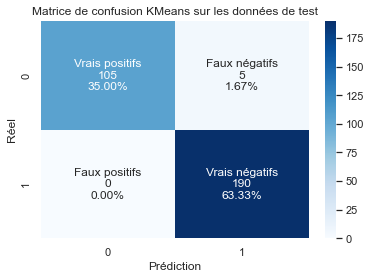

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       110
           1       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [97]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(df_kMeans_test['is_genuine'], df_kMeans_test['cluster'])

# Définir les noms de groupe et les étiquettes pour la heatmap
group_names = ['Vrais positifs', 'Faux négatifs', 'Faux positifs', 'Vrais négatifs']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Afficher la heatmap de la matrice de confusion
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Matrice de confusion KMeans sur les données de test")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# Afficher les métriques de classification
classification = classification_report(df_kMeans_test['is_genuine'], df_kMeans_test['cluster'])
print(classification)

* **Matrice de confusion données sur toutes les données**

In [98]:
df_kmeans=df_med.copy()
df_kmeans.shape

(1500, 7)

In [99]:
# Sélection des variables à utiliser pour l'ACP
X_selected = df_med.drop('is_genuine', axis=1)

# Standardisation des données
scaler = StandardScaler()
X_scaled_Km = scaler.fit_transform(X_selected)

#Instancier et transformer 
pca = decomposition.PCA()
pca.fit(X_scaled_Km)

# Appliquer l'ACP sur les données
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_selected)

# Appliquer l'algorithme KMeans avec le nombre de clusters optimal déterminé
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_projected)

# Ajouter une colonne "cluster" au dataframe initial avec les étiquettes de cluster
df_kmeans['cluster'] = kmeans.labels_

# Afficher le dataframe avec la colonne "cluster"
df_kmeans

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95    4.520000       2.89   
1              1    171.46       103.36        103.66    3.770000       2.99   
2              1    172.69       104.48        103.50    4.400000       2.94   
3              1    171.36       103.91        103.94    3.620000       3.01   
4              1    171.73       104.28        103.46    4.040000       3.48   
5              1    172.17       103.74        104.08    4.420000       2.95   
6              1    172.34       104.18        103.85    4.580000       3.26   
7              1    171.88       103.76        104.08    3.980000       2.92   
8              1    172.47       103.92        103.67    4.000000       3.25   
9              1    172.47       104.07        104.02    4.040000       3.25   
10             1    171.83       104.14        103.62    3.160000       3.18   
11             1    171.84       104.59        104.00    3.880000       3.27   
12             1    171.89       103.89        103.40    4.110000       2.96   
13             1    172.20       104.35        103.67    4.440000       3.38   
14             1    172.06       103.87        103.83    4.090000       2.92   
15             1    171.73       103.92        103.74    4.430000       2.78   
16             1    171.30       104.19        103.70    4.120000       2.82   
17             1    171.88       104.47        103.45    4.560000       3.33   
18             1    172.47       103.89        104.14    3.740000       3.28   
19             1    171.90       103.67        103.15    4.550000       3.15   
20             1    171.87       103.91        103.96    3.740000       2.97   
21             1    171.82       103.65        103.64    4.250000       2.80   
22             1    172.10       103.96        103.71    3.930000       2.89   
23             1    172.56       103.85        103.62    3.320000       3.13   
24             1    172.22       103.75        103.89    4.180000       3.19   
25             1    172.09       103.63        103.33    4.320000       2.88   
26             1    171.83       103.44        103.70    4.150000       3.10   
27             1    171.88       103.92        103.74    4.020000       3.17   
28             1    172.02       104.18        104.16    3.970000       3.23   
29             1    171.58       103.59        103.79    4.100000       2.92   
30             1    171.71       103.95        103.97    4.000000       2.83   
31             1    171.98       104.33        103.61    3.680000       3.14   
32             1    171.99       103.79        103.90    4.620000       2.90   
33             1    171.85       104.10        103.88    4.130000       2.93   
34             1    172.29       103.61        104.44    4.540000       2.69   
35             1    172.01       103.81        103.65    4.360000       3.03   
36             1    171.80       104.28        104.06    4.470000       3.29   
37             1    171.73       104.10        104.19    3.390000       3.19   
38             1    172.00       103.76        104.27    4.420000       3.29   
39             1    172.28       104.11        104.19    3.930000       3.08   
40             1    172.44       103.96        104.55    3.730000       2.86   
41             1    172.08       104.19        103.82    3.990000       3.21   
42             1    172.10       103.73        103.33    3.720000       3.02   
43             1    172.40       103.41        103.85    4.010000       3.15   
44             1    171.79       103.83        103.76    3.990000       3.18   
45             1    171.42       104.65        103.63    3.990000       3.05   
46             1    171.47       103.74        104.42    4.190000       2.92   
47             1    172.13       104.15        103.93    3.970000       2.87   
48             1    172.07       104.05        103.82    3.710000       3.61   
49    

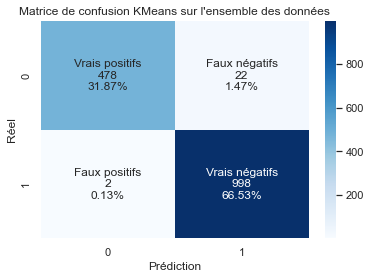

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       500
           1       0.98      1.00      0.99      1000

    accuracy                           0.98      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [100]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(df_kmeans['is_genuine'], df_kmeans['cluster'])

# Définir les noms de groupe et les étiquettes pour la heatmap
group_names = ['Vrais positifs', 'Faux négatifs', 'Faux positifs', 'Vrais négatifs']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Afficher la heatmap de la matrice de confusion
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Matrice de confusion KMeans sur l'ensemble des données")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# Afficher les métriques de classification
classification = classification_report(df_kmeans['is_genuine'], df_kmeans['cluster'])
print(classification)

* 22 billets vrais ont été considérés comme faux par le clustering, et 2 faux billets ont été détecté comme vrai.
* La précision est une mesure de la proportion d'exemples positifs qui ont été correctement classés parmi l'ensemble des exemples que le modèle a classés comme positifs. Dans notre rapport, la précision pour la classe 0 est de 1.00, ce qui signifie que tous les exemples classés comme faux billets sont réellement des faux billets. Pour la classe 1, la précision est de 0.98, ce qui signifie que 98% des exemples classés comme vrais billets sont réellement des vrais billets.
* Le rappel (ou sensibilité) est une mesure de la proportion d'exemples positifs qui ont été correctement classés parmi l'ensemble des exemples réellement positifs. Dans notre rapport, le rappel pour la classe 0 est de 0.95, ce qui signifie que 95% des faux billets ont été correctement identifiés comme tels. Pour la classe 1, le rappel est de 1.00, ce qui signifie que tous les vrais billets ont été correctement identifiés comme tels.
* Le F1-score est une mesure combinée de la précision et du rappel, qui permet d'évaluer la performance globale du modèle en termes de trade-off entre la précision et le rappel. Dans notre rapport, le F1-score pour la classe 0 est de 0.97, ce qui indique une bonne performance globale pour la détection des faux billets. Pour la classe 1, le F1-score est de 0.99, ce qui indique une excellente performance pour la détection des vrais billets.
* L'accuracy (ou exactitude) est une mesure de la proportion d'exemples correctement classés parmi l'ensemble des exemples. Dans notre rapport, l'accuracy est de 0.98, ce qui signifie que le modèle a correctement classé 98% des exemples dans l'ensemble de données.
* Le macro avg et le weighted avg sont des mesures agrégées pour l'ensemble des données. Le macro avg calcule les moyennes non pondérées des mesures de performance pour chaque classe, tandis que le weighted avg calcule les moyennes pondérées des mesures de performance en fonction de la taille de chaque classe. Dans notre rapport, le macro avg et le weighted avg sont tous les deux de 0.98, ce qui indique une performance globale du modèle très bonne.

* Dans notre cas, le modèle a une précision élevée (1.00 pour la classe 0 et 0.98 pour la classe 1), ce qui indique qu'il y a peu de faux positifs. Le rappel est également élevé (0.96 pour la classe 0 et 1.00 pour la classe 1), ce qui indique qu'il y a peu de faux négatifs. Le F1-score est élevé pour les deux classes, ce qui indique que le modèle est à la fois précis et sensible. L'accuracy est de 0.98, ce qui signifie que le modèle prédit correctement la classe de 98% des observations.

### Deploiement du modèle : test sur un df inconnu

#### On enregistre le modèle dans une fonction 

In [101]:
def apply_kmeans(df, pca, kmeans):
    # Sélectionner les mêmes variables que dans le dataframe d'entraînement
    X = df.loc[:, ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
    
    # Appliquer la transformation PCA sur les données
    X_projected = pca.transform(X)

    # Prédire les étiquettes de cluster pour les données
    labels = kmeans.predict(X_projected)

    # Ajouter la colonne "cluster" au dataframe
    df['cluster'] = labels
    
    # Convertir les valeurs 0 et 1 en "faux" et "vrai"
    df['is_genuine'] = ["faux" if p == 0 else "vrai" for p in df['cluster']]
    
    return df

#### On applique le modèle sur des données inconnues

In [102]:
# Charger les données à prédire
df_new = pd.read_csv('billets_production.csv')

# Appliquer le modèle KMeans sur les données de prédiction
df_new = apply_kmeans(df_new, pca, kmeans)
df_new

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   cluster is_genuine  
0        0       faux  
1        0       faux  
2        0       faux  
3        1       vrai  
4        1       vrai

## **Regression logistique**

In [103]:
#suppression des colonnes inutiles
df_reg = df_med.copy()

In [104]:
df_reg.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

* Préparation des données

In [105]:
#Préparation des données
# Séparation des variables dépendantes et indépendantes
X = df_reg[['margin_low', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y = df_reg['is_genuine']

In [106]:
#Séparation entre les données d'entrainement et les données test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [107]:
# Construction du modèle de régression logistique avec constante
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.030441
         Iterations 13


### Evaluation du modèle

In [108]:
# Affichage des résultats du modèle
print(result.summary())

# Prédiction des résultats sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(sm.add_constant(X_train)) > 0.5
y_test_pred = result.predict(sm.add_constant(X_test)) > 0.5

# Évaluation des performances du modèle sur l'ensemble d'entraînement et de test
print("Métriques d'évaluation sur l'ensemble d'entraînement:")
print("Précision : {:.2f}%".format(precision_score(y_train, y_train_pred)*100))
print("Rappel : {:.2f}%".format(recall_score(y_train, y_train_pred)*100))
print("F1-score : {:.2f}%".format(f1_score(y_train, y_train_pred)*100))
print("AUC-ROC : {:.2f}%".format(roc_auc_score(y_train, y_train_pred)*100))

print("Métriques d'évaluation sur l'ensemble de test:")
print("Précision : {:.2f}%".format(precision_score(y_test, y_test_pred)*100))
print("Rappel : {:.2f}%".format(recall_score(y_test, y_test_pred)*100))
print("F1-score : {:.2f}%".format(f1_score(y_test, y_test_pred)*100))
print("AUC-ROC : {:.2f}%".format(roc_auc_score(y_test, y_test_pred)*100))



                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            6
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.9517
Time:                        21:25:58   Log-Likelihood:                -36.529
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                4.467e-308
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -83.6215    257.724     -0.324      0.746    -588.751     421.508
margin_low      -5.3394      0.980     -5.450      0.000      -7.260      -3.419
diagonal        -0.3846      1.151     -0.33

**MODE DE LECTURE**

* La ligne "Iterations 11" indique le nombre d'itérations que l'algorithme a effectuées pour estimer les coefficients de régression. Cette information peut être intéressante lorsque l'on souhaite comparer la vitesse d'execution de différents algorithme

* La ligne "Method: MLE" signifie que la méthode utilisée pour ajuster le modèle de régression logistique est la méthode du maximum de vraisemblance (Maximum Likelihood Estimation en anglais), qui est une méthode couramment utilisée pour estimer les paramètres des modèles statistiques en se basant sur la maximisation de la fonction de vraisemblance des données observées

* La ligne "converged: True" signifie que l'algorithme d'optimisation utilisé pour entraîner le modèle de régression logistique a convergé vers une solution optimale. En d'autres termes, il a atteint le minimum de la fonction de coût, qui correspond au maximum de la vraisemblance du modèle. Si cette ligne affichait "False", cela signifierait que l'algorithme n'a pas convergé et qu'il pourrait y avoir des problèmes avec le modèle

* Le pseudo R-carré (Pseudo R-squared) est une mesure de la qualité de l'ajustement d'un modèle de régression logistique. Le pseudo R-carré ne peut pas être directement comparé au R-carré dans une régression linéaire, car les deux mesures sont calculées différemment. Dans une régression linéaire, le R-carré mesure la proportion de variance expliquée par le modèle par rapport à la variance totale, tandis que dans une régression logistique, il n'existe pas de mesure équivalente de variance totale.

Le pseudo R-carré est donc une mesure relative de l'ajustement du modèle et peut varier de 0 à 1, avec des valeurs plus élevées indiquant un meilleur ajustement. Dans le cas présent, le modèle a un pseudo R-carré de 0,8872, ce qui suggère un très bon ajustement aux données. Cependant, il est important de noter que le pseudo R-carré ne doit pas être utilisé comme mesure absolue de la qualité de l'ajustement, mais plutôt comme une mesure comparative entre différents modèles

* Le log-vraisemblance est une mesure de l'adéquation globale du modèle aux données. Plus le log-vraisemblance est proche de zéro, meilleur est l'ajustement. Dans ce cas, le log-vraisemblance est -74.519, ce qui indique que le modèle s'ajuste bien aux données.

* La valeur de LL-Null permet de calculer le Pseudo R-carré

* Le LLR p-value (ou la valeur p du rapport de vraisemblance) indique si le modèle que nous avons construit est significativement meilleur que le modèle nul. Plus la valeur p est proche de zéro, plus la différence de vraisemblance entre les deux modèles est importante et plus le modèle construit est considéré comme significatif. Dans ce cas-ci, la valeur de la p-value est très proche de zéro (3.636e-251), ce qui suggère que le modèle est très significatif.

* Le coefficient estime l'impact de chaque variable sur la probabilité de prédire la valeur 1 de is_genuine.

* Les variables ont une valeur p inférieure à 0.05, ce qui suggère qu'elles ont un impact significatif sur la prédiction de la variable binaire.

* La mention "Possibly complete quasi-separation" indique qu'il est possible qu'il y ait une quasi-séparation complète dans les données, ce qui signifie que les valeurs des 6 variables prédictives correspondent à des valeurs de la variable is_genuine. Cela peut poser des problèmes pour l'estimation des paramètres, car certaines valeurs ne peuvent pas être estimées avec précision. Cependant, cela ne signifie pas nécessairement que le modèle n'est pas valide. Il est important de considérer les résultats de toutes les métriques d'évaluation pour déterminer si le modèle est approprié pour notre ensemble de données.Celà peut aussi venir du fait que nos données sont artificielles et donc peu réalistes.

**INTERPRETATION**

Les résultats de la régression logistique indiquent que la variable 'is_genuine' est significativement influencée par les variables indépendantes 'margin_low', 'height_right', 'margin_up' et 'length'. Les variables 'diagonal' et 'height_left' n'ont pas montré une influence significative. Le pseudo R-carré est de 0,95, ce qui indique que le modèle est capable d'expliquer une grande partie de la variance dans la variable 'is_genuine'. Les métriques d'évaluation sur l'ensemble d'entraînement et de test suggèrent que le modèle est performant.. Cela signifie que ces variables ont un impact sur la probabilité qu'un billet soit vrai ou faux.

En examinant les coefficients de régression, on peut voir que la hauteur gauche, la hauteur droite et la marge supérieure ont une relation négative avec la variable cible, ce qui suggère que des valeurs plus élevées de ces variables sont associées à une probabilité plus faible que le billet soit vrai. À l'inverse, la longueur du billet est positivement associée à la variable cible, ce qui suggère qu'une valeur plus élevée de cette variable est associée à une probabilité plus élevée que le billet soit vrai.

Enfin, la diagonale n'a pas une forte association avec la variable cible, car son coefficient de régression est proche de zéro et sa valeur P est supérieure à 0,05. Cela suggère que cette variable n'est pas très utile pour prédire si un billet est vrai ou faux.

**AJUSTEMENT DU MODELE**

In [109]:
#Préparation des données
# on supprime diagonal qui a la pvalue la plus élevée
X = df_reg[['margin_low','height_left', 'height_right', 'margin_up', 'length']]
y = df_reg['is_genuine']

#Séparation entre les données d'entrainement et les données test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Construction du modèle de régression logistique avec constante
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()


# Affichage des résultats du modèle
print(result.summary())

# Prédiction des résultats sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(sm.add_constant(X_train)) > 0.5
y_test_pred = result.predict(sm.add_constant(X_test)) > 0.5

# Évaluation des performances du modèle sur l'ensemble d'entraînement et de test
print("Métriques d'évaluation sur l'ensemble d'entraînement:")
print("Précision : {:.2f}%".format(precision_score(y_train, y_train_pred)*100))
print("Rappel : {:.2f}%".format(recall_score(y_train, y_train_pred)*100))
print("F1-score : {:.2f}%".format(f1_score(y_train, y_train_pred)*100))
print("AUC-ROC : {:.2f}%".format(roc_auc_score(y_train, y_train_pred)*100))

print("Métriques d'évaluation sur l'ensemble de test:")
print("Précision : {:.2f}%".format(precision_score(y_test, y_test_pred)*100))
print("Rappel : {:.2f}%".format(recall_score(y_test, y_test_pred)*100))
print("F1-score : {:.2f}%".format(f1_score(y_test, y_test_pred)*100))
print("AUC-ROC : {:.2f}%".format(roc_auc_score(y_test, y_test_pred)*100))



Optimization terminated successfully.
         Current function value: 0.030488
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1194
Method:                           MLE   Df Model:                            5
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.9517
Time:                        21:25:58   Log-Likelihood:                -36.585
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                2.646e-309
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -147.1542    174.818     -0.842      0.400    -489.792     195.483
margin_low      -5.229

In [110]:
#Préparation des données
# on supprime hight_left qui a la pvalue la plus élevée
X = df_reg[['margin_low','height_right', 'margin_up', 'length']]
y = df_reg['is_genuine']

#Séparation entre les données d'entrainement et les données test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Construction du modèle de régression logistique avec constante
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()


# Affichage des résultats du modèle
print(result.summary())

# Prédiction des résultats sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(sm.add_constant(X_train)) > 0.5
y_test_pred = result.predict(sm.add_constant(X_test)) > 0.5

# Évaluation des performances du modèle sur l'ensemble d'entraînement et de test
print("Métriques d'évaluation sur l'ensemble d'entraînement:")
print("Précision : {:.2f}%".format(precision_score(y_train, y_train_pred)*100))
print("Rappel : {:.2f}%".format(recall_score(y_train, y_train_pred)*100))
print("F1-score : {:.2f}%".format(f1_score(y_train, y_train_pred)*100))
print("AUC-ROC : {:.2f}%".format(roc_auc_score(y_train, y_train_pred)*100))

print("Métriques d'évaluation sur l'ensemble de test:")
print("Précision : {:.2f}%".format(precision_score(y_test, y_test_pred)*100))
print("Rappel : {:.2f}%".format(recall_score(y_test, y_test_pred)*100))
print("F1-score : {:.2f}%".format(f1_score(y_test, y_test_pred)*100))
print("AUC-ROC : {:.2f}%".format(roc_auc_score(y_test, y_test_pred)*100))


Optimization terminated successfully.
         Current function value: 0.031405
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.9502
Time:                        21:25:58   Log-Likelihood:                -37.686
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                3.934e-310
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -294.9173    152.205     -1.938      0.053    -593.234       3.399
margin_low      -5.264

Les résultats après la régression backward montrent une amélioration car les variables restantes (height_right, margin_up, length,margin_low) ont toutes des p-values inférieures à 0,05, ce qui suggère qu'elles sont significatives pour la prédiction de la variable cible. La variable diagonal a été supprimée car sa p-value était supérieure à 0,05. Par conséquent, la suppression de cette variable a permis d'améliorer le modèle.

* Précision : la proportion de prédictions positives du modèle qui sont correctes. Dans ce cas, le modèle a une précision de 99.14%, ce qui signifie que 99.14% des billets prédits comme vrais le sont réellement.

* Rappel : la proportion de vrais positifs que le modèle a identifiés parmi tous les vrais positifs. Dans ce cas, le modèle a un rappel de 99.63%, ce qui signifie qu'il a identifié tous les billets réels comme tels.

* F1-score : une moyenne pondérée de la précision et du rappel, qui permet d'évaluer la qualité globale de la prédiction. Dans ce cas, le F1-score est de 99.38%.

* AUC-ROC : une mesure de la capacité du modèle à distinguer les classes positives et négatives. L'AUC-ROC est une valeur entre 0 et 1, où une valeur de 1 indique une performance parfaite. Dans ce cas, le modèle a un AUC-ROC de 98.92%, ce qui indique qu'il est très performant pour distinguer les vrais billets des faux billets.

* **Test de Wald**

le Test de Wald permet de s'assurer que les coef de nos variables sont significatifs

In [111]:
# Création du modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)

# Entraînement du modèle
result = logit_model.fit()

# Test de Wald pour chaque variable
wald_tests = result.wald_test_terms()

# Affichage des résultats
print(wald_tests)

Optimization terminated successfully.
         Current function value: 0.033108
         Iterations 11
                   chi2        P>chi2  df constraint
margin_low    37.024695  1.166426e-09              1
height_right  48.499287  3.304089e-12              1
margin_up     21.813055  3.005481e-06              1
length        55.457228  9.551484e-14              1


Les résultats du test de Wald suggèrent que les variables "margin_low", "height_right", "margin_up" et "length" ont une influence significative sur la variable de sortie "Type" dans notre modèle. Il est donc recommandé de garder ces variables dans le modèle et de considérer leur influence lors de l'interprétation des résultats.

In [112]:
#Relance la regression sans diagonal et height left
#Préparation des données
X = df_reg.copy()
X = X.iloc[:, 2:]
y = df_reg.iloc[:, 0]
#Séparation entre les données d'entrainement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.20, random_state=42)
#Instanciation d'un modèle nommé lr
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

* On test sur les données de training

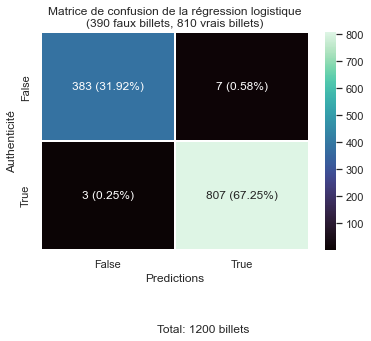

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       390
           1       0.99      1.00      0.99       810

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [113]:
# Calculer la matrice de confusion pour l'ensemble d'entraînement
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Calculer le nombre total de billets vrais et faux
count_true, count_false = pd.Series(y_train).value_counts()

# Calculer la matrice de confusion sous forme de pourcentages par rapport au nombre total de billets
conf_matrix_percent = np.round((conf_matrix / len(y_train)) * 100, 2)

# Créer une liste d'étiquettes pour les annotations des cellules
annot = [f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]}%)" for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]
annot = np.asarray(annot).reshape(conf_matrix.shape[0], conf_matrix.shape[1])

# Afficher la matrice de confusion sous forme de heatmap avec l'annotation du nombre total de billets vrais et faux
sns.heatmap(conf_matrix,
            annot=annot,
            fmt="",
            cmap=sns.color_palette("mako", as_cmap=True),
            linecolor="white",
            linewidths=0.3,
            xticklabels=["False", "True"],
            yticklabels=["False", "True"])
plt.xlabel("Predictions")
plt.ylabel("Authenticité")
plt.title(f"Matrice de confusion de la régression logistique\n"
          f"({count_false} faux billets, {count_true} vrais billets)")
plt.text(0.5, -0.15, f"Total: {len(y_train)} billets",
         ha="center", va="center", transform=plt.gcf().transFigure)
plt.show()

# Afficher les scores de classification
print(classification_report(y_train, y_train_pred))



* On test sur les données de test

In [114]:
# Préparation des données
X = df_reg[['margin_low','height_right', 'margin_up', 'length']]
y = df_reg['is_genuine']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Construction du modèle de régression logistique
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prédiction des résultats sur l'ensemble d'entraînement et de test
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Affichage de la matrice de confusion pour l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)


[[105   5]
 [  0 190]]


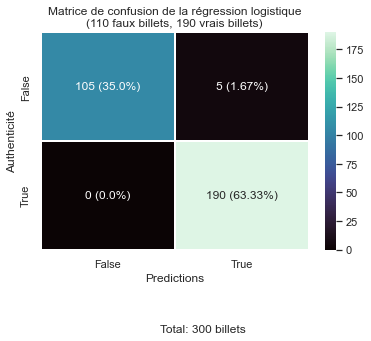

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       110
           1       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [115]:
# Calculer la matrice de confusion pour l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculer le nombre total de billets vrais et faux
count_true, count_false = pd.Series(y_test).value_counts()

# Calculer la matrice de confusion sous forme de pourcentages par rapport au nombre total de billets
conf_matrix_percent = np.round((conf_matrix / len(y_test)) * 100, 2)

# Créer une liste d'étiquettes pour les annotations des cellules
annot = [f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]}%)" for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]
annot = np.asarray(annot).reshape(conf_matrix.shape[0], conf_matrix.shape[1])

# Afficher la matrice de confusion sous forme de heatmap avec l'annotation du nombre total de billets vrais et faux
sns.heatmap(conf_matrix,
            annot=annot,
            fmt="",
            cmap=sns.color_palette("mako", as_cmap=True),
            linecolor="white",
            linewidths=0.3,
            xticklabels=["False", "True"],
            yticklabels=["False", "True"])
plt.xlabel("Predictions")
plt.ylabel("Authenticité")
plt.title(f"Matrice de confusion de la régression logistique\n"
          f"({count_false} faux billets, {count_true} vrais billets)")
plt.text(0.5, -0.15, f"Total: {len(y_test)} billets",
         ha="center", va="center", transform=plt.gcf().transFigure)
plt.show()

# Afficher les mesures de performance
print(classification_report(y_test, y_test_pred))



Sur 300 billets

* 105 billets ont été prédits comme étant faux et ils étaient effectivement faux (vrais négatifs)
* 5 billets ont été prédits comme étant faux mais ils étaient en réalité vrais (faux positifs)
* 0 billet a été prédit comme étant vrai alors qu'il était faux (faux négatifs)
* 190 billets ont été prédits comme étant vrais et ils étaient effectivement vrais (vrais positifs)

On note une erreur du modèle d'environs 1.7%

* On ajoute la courbe Au roc

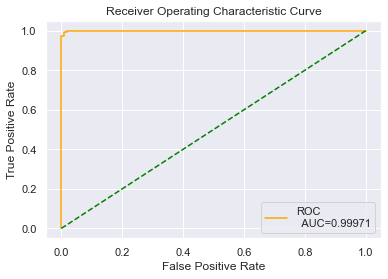

In [116]:
def plot_roc_curve(fper, tper):
    aucf = metrics.auc(fper, tper)
    plt.plot(fper, tper, color='orange', label='ROC'+ "\n"'  AUC=%1.5f' % aucf)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

# Calcul des scores de probabilité sur l'ensemble de test
y_test_prob = logreg.predict_proba(X_test)[:, 1]

# Calcul des FPR, TPR et seuils pour la courbe ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

# Tracer la courbe ROC
plot_roc_curve(fpr, tpr)



Un modèle avec une courbe ROC qui se rapproche du coin supérieur gauche a une forte capacité de distinction entre les classes positives et négatives. Cela signifie que le modèle peut correctement identifier un grand pourcentage d'observations positives, tout en minimisant le nombre d'observations négatives incorrectement identifiées comme positives.En revanche, un modèle avec une courbe ROC qui se rapproche de la diagonale aléatoire a une performance faible, car il ne peut pas bien distinguer les classes positives et négatives. Le classifieur optimal dans la courbe ROC est le modèle qui maximise l'aire sous la courbe (AUC, pour Area Under the Curve). L'AUC mesure la capacité globale du modèle à distinguer les classes positives et négatives pour tous les seuils de classification possibles. Plus l'AUC est élevée, meilleure est la performance du modèle.

Le classifieur optimal est celui qui atteint l'AUC maximale, c'est-à-dire qui a la plus grande capacité de distinction entre les classes positives et négatives. Un AUC de 1 représente un modèle parfait qui peut parfaitement distinguer les classes positives et négatives pour tous les seuils de classification possibles. En revanche, un AUC de 0,5 représente un modèle qui ne peut pas faire mieux que de prédire les classes au hasard.Ici notre AUC est de 0.99

* on test sur l'ensemble des données

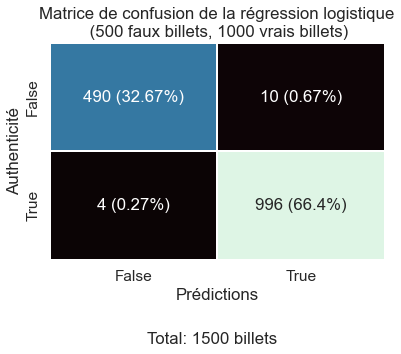

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       500
           1       0.99      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [117]:
# Préparation des données
X = df_reg[['margin_low','height_right', 'margin_up', 'length']]
y = df_reg['is_genuine']

# Construction du modèle de régression logistique
logreg = LogisticRegression()
logreg.fit(X, y)

# Prédiction des résultats sur l'ensemble des données
y_pred = logreg.predict(X)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y, y_pred)

# Calcul du nombre total de billets vrais et faux
count_true, count_false = pd.Series(y).value_counts()

# Calcul de la matrice de confusion sous forme de pourcentages par rapport au nombre total de billets
conf_matrix_percent = np.round((conf_matrix / len(y)) * 100, 2)

# Création d'une liste d'étiquettes pour les annotations des cellules
annot = [f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]}%)" for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]
annot = np.asarray(annot).reshape(conf_matrix.shape[0], conf_matrix.shape[1])

# Affichage de la matrice de confusion sous forme de heatmap avec l'annotation du nombre total de billets vrais et faux
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=annot, fmt="", cmap=sns.color_palette("mako", as_cmap=True), linecolor="white", linewidths=0.3, xticklabels=["False", "True"], yticklabels=["False", "True"], cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Authenticité")
plt.title(f"Matrice de confusion de la régression logistique\n ({count_false} faux billets, {count_true} vrais billets)")
plt.text(0.5, -0.15, f"Total: {len(y)} billets", ha="center", va="center", transform=plt.gcf().transFigure)
plt.show()

# Affichage des mesures de performance
print(classification_report(y, y_pred))


* Calcul des scores

In [118]:
# Prédiction des résultats sur l'ensemble des données
y_pred = logreg.predict(X)

# Calcul des scores
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Affichage des scores
print("Précision:", accuracy)
print("Spécificité:", precision)
print("Sensibilité:", recall)
print("Score F1:", f1)


Précision: 0.9906666666666667
Spécificité: 0.9900596421471173
Sensibilité: 0.996
Score F1: 0.9930209371884346


* La précision de 0,991 indique que le modèle a correctement prédit 99,1% des billets dans leur catégorie respective (vrai ou faux).

* La spécificité de 0,99 indique que le modèle a correctement identifié 98,9% des billets authentiques (catégorie négative) parmi tous les billets prédits comme tels.

* La sensibilité de 0,998 indique que le modèle a correctement identifié 99% des billets contrefaits (catégorie positive) parmi tous les billets prédits comme tels.

* Le score F1 de 0,993 est une moyenne pondérée de la précision et de la sensibilité, qui prend en compte à la fois les vrais positifs et les faux positifs.

Dans l'ensemble, ces résultats indiquent que le modèle est très performant dans la détection des billets authentiques et contrefaits, avec une précision, une spécificité et une sensibilité élevées.

* Odds ratios

In [119]:
# Odds Ratios:
coef_dict = {}
for coef, feat in zip(logreg.coef_[0], X.columns):
    odds_ratio = np.exp(coef)
    coef_dict[feat] = odds_ratio
print("Les Odds ratios sont :")
for feat, odds_ratio in coef_dict.items():
    print(f"{feat} : {odds_ratio:.4f}")


Les Odds ratios sont :
margin_low : 0.0226
height_right : 0.1637
margin_up : 0.0318
length : 66.6658


Les résultats des Odds Ratio permettent d'interpréter l'influence de chaque variable sur la variable cible (la classification "vrai" ou "faux" des billets).

On peut voir que la variable la plus influente est "length" avec un Odds Ratio très élevé (plus de 66), cela signifie qu'une augmentation d'une unité de "length" multiplie les chances que le billet soit vrai par plus de 66.

Les autres variables ont des Odds Ratio beaucoup plus faibles, mais tout de même significatifs.

### Deploiement du modèle : test sur un df inconnu

#### On enregistre le modèle 

In [120]:
import pickle

# Enregistrer le modèle sur le disque
with open('modele.pkl', 'wb') as f:
    pickle.dump(logreg, f)



#### On test le modèle

In [121]:
# Charger le modèle depuis le disque
with open('modele.pkl', 'rb') as f:
    logreg = pickle.load(f)

# Utiliser le modèle pour prédire les résultats sur un nouveau dataframe
# Charger le nouveau dataframe
df_billet_log = pd.read_csv("billets_production.csv")
X_new = df_billet_log[['margin_low','height_right', 'margin_up', 'length']]
y_pred = logreg.predict(X_new)
y_pred

array([0, 0, 0, 1, 1], dtype=int64)

In [122]:
# Charger le nouveau dataframe
df_billet_log = pd.read_csv("billets_production.csv")

# Utiliser le modèle pour prédire les résultats sur un nouveau dataframe
X_new = df_billet_log[['margin_low','height_right', 'margin_up', 'length']]
y_pred = logreg.predict(X_new)

# Créer une colonne avec les prédictions en format texte
df_billet_log['is_genuine_predicted'] = np.where(y_pred==0, "faux", "vrai")
df_billet_log


diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

  is_genuine_predicted  
0                 faux  
1                 faux  
2                 faux  
3                 vrai  
4                 vrai

## **k-NN (k Nearest Neighbors)**

L'algorithme k-NN (k Nearest Neighbors) est un algorithme de classification et de régression non paramétrique. Il est utilisé pour prédire la classe ou la valeur numérique d'un nouvel échantillon en se basant sur les k échantillons les plus proches dans l'ensemble de données d'entraînement.le principe de ce modèle consiste à choisir les k données les plus proches du point étudié afin d’en prédire sa valeur.

k-NN est un modèle de classification supervisée basée sur les distances entre les observations tandis que k-means est un modèle de clustering non supervisé basé sur les similitudes entre les observations.

le k-NN est un type spécial d’algorithme qui n’utilise pas de modèle statistique. Il est "non paramétrique" et il se base uniquement sur les données d’entraînement. Ce type d’algorithme est appelé memory-based. A contrario, la régression linéaire est paramétrique, de paramètre θ
 et ne va donc pas avoir besoin de conserver toutes les données pour effectuer des prédictions, mais seulement θ
. C'est d'ailleurs un inconvénient de l'algorithme k-NN, il doit conserver toutes les données d'entraînement en mémoire (memory-based) et donc convient aux problèmes d'assez petite taille.

### Préparation des données

In [123]:
df_kNN=df_med.copy()

In [124]:
#on divisez le dataframe en ensemble d'entraînement et ensemble de test :
X_kNN = df_kNN.drop(['is_genuine'], axis=1)
y_kNN = df_kNN['is_genuine']
X_train_kNN, X_test_kNN, y_train_kNN, y_test_kNN = train_test_split(X_kNN, y_kNN, test_size=0.2, random_state=42)


In [125]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_kNN)
X_test_scaled = scaler.transform(X_test_kNN)

### On déterminer le k optimal et on entraine le modèle

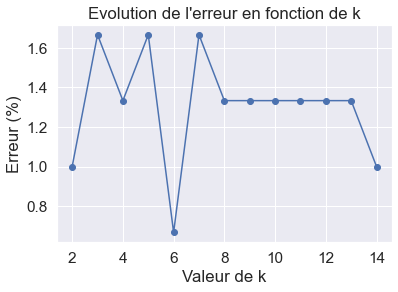

In [126]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1 - knn.fit(X_train_scaled, y_train_kNN).score(X_test_scaled, y_test_kNN)))
plt.plot(range(2, 15), errors, 'o-')
plt.title("Evolution de l'erreur en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("Erreur (%)")
plt.show()

Comme on peut le voir, le k-NN le plus performant est celui pour lequel k = 6

In [127]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_scaled, y_train_kNN)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 9}
Résultats de la validation croisée :
accuracy = 0.989 (+/-0.007) for {'n_neighbors': 3}
accuracy = 0.988 (+/-0.010) for {'n_neighbors': 5}
accuracy = 0.990 (+/-0.004) for {'n_neighbors': 7}
accuracy = 0.991 (+/-0.006) for {'n_neighbors': 9}
accuracy = 0.990 (+/-0.004) for {'n_neighbors': 11}
accuracy = 0.991 (+/-0.006) for {'n_neighbors': 13}
accuracy = 0.990 (+/-0.008) for {'n_neighbors': 15}


La deuxième méthode est plus fiable pour obtenir le k optimal, car elle utilise une recherche d'hyperparamètres par validation croisée pour évaluer les performances du modèle pour différentes valeurs de k. Cela permet de mieux prendre en compte la variance des données et d'éviter le surapprentissage. De plus, la validation croisée permet de s'assurer que le modèle généralise bien aux données inconnues. Le premier code utilise simplement une boucle pour évaluer les performances du modèle pour différentes valeurs de k, sans prendre en compte la variance des données ni la généralisation aux données inconnues. 

Nous choisissons donc un k = 9

### On évalue le modèle

In [128]:
# Utiliser le classifieur avec les meilleurs hyperparamètres pour prédire sur l'ensemble de test
y_pred_kNN = clf.predict(X_test_scaled)

# Afficher les performances sur l'ensemble de test
print("Performance sur l'ensemble de test :")
print("Accuracy :", metrics.accuracy_score(y_test_kNN, y_pred_kNN))
print("Precision :", metrics.precision_score(y_test_kNN, y_pred_kNN))
print("Recall :", metrics.recall_score(y_test_kNN, y_pred_kNN))
print("F1-score :", metrics.f1_score(y_test_kNN, y_pred_kNN))


Performance sur l'ensemble de test :
Accuracy : 0.9866666666666667
Precision : 0.979381443298969
Recall : 1.0
F1-score : 0.9895833333333333


Les résultats montrent que l'algorithme de prédiction k-NN avec une recherche de k optimal à travers la validation croisée a bien fonctionné sur l'ensemble de test. La précision obtenue est de 0.986, ce qui indique que 98,6% des billets prédits comme faux étaient effectivement faux. Le rappel obtenu est de 1, ce qui signifie que l'algorithme a correctement identifié tous les billets faux dans l'ensemble de test. Le score F1 est de 0.99, ce qui est un bon score et indique que l'algorithme est capable de prédire à la fois les vrais et les faux billets avec précision. Enfin, le score d'exactitude (accuracy) est de 0.98, ce qui indique que l'algorithme a prédit correctement 98% des billets de l'ensemble de test. En résumé, l'algorithme de prédiction k-NN a bien fonctionné pour ce jeu de données et les résultats sont encourageants.

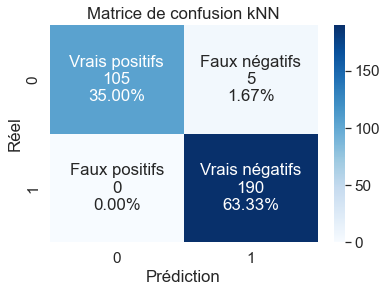

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       110
           1       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [129]:
# Entraînement du modèle
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_kNN)

# Prédiction sur l'ensemble de test
y_pred_kNN = knn.predict(X_test_scaled)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test_kNN, y_pred_kNN)

# Définir les noms de groupe et les étiquettes pour la heatmap
group_names = ['Vrais positifs', 'Faux négatifs', 'Faux positifs', 'Vrais négatifs']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Afficher la heatmap de la matrice de confusion
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Matrice de confusion kNN")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# Afficher les métriques de classification
classification = classification_report(y_test_kNN, y_pred_kNN)
print(classification)


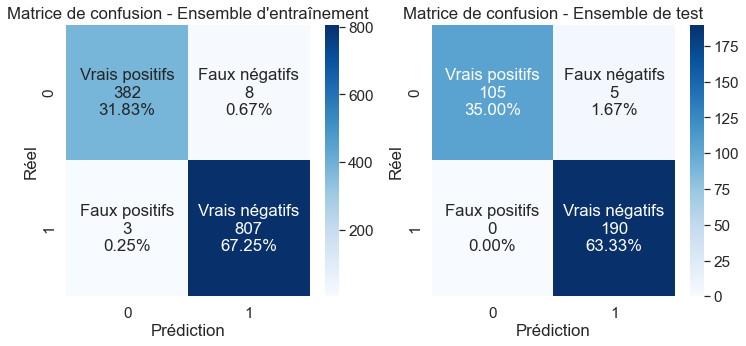

Métriques de classification - Ensemble d'entraînement:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       390
           1       0.99      1.00      0.99       810

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200


Métriques de classification - Ensemble de test:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       110
           1       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [130]:
# Entraînement du modèle
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_kNN)

# Prédiction sur l'ensemble de test et d'entraînement
y_pred_test_kNN = knn.predict(X_test_scaled)
y_pred_train_kNN = knn.predict(X_train_scaled)

# Créer les matrices de confusion pour l'ensemble de test et d'entraînement
conf_matrix_test = confusion_matrix(y_test_kNN, y_pred_test_kNN)
conf_matrix_train = confusion_matrix(y_train_kNN, y_pred_train_kNN)

# Définir les noms de groupe et les étiquettes pour la heatmap
group_names = ['Vrais positifs', 'Faux négatifs', 'Faux positifs', 'Vrais négatifs']
group_counts_test = ['{0:0.0f}'.format(value) for value in conf_matrix_test.flatten()]
group_percentages_test = ['{0:.2%}'.format(value) for value in conf_matrix_test.flatten()/np.sum(conf_matrix_test)]
labels_test = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts_test, group_percentages_test)]
labels_test = np.asarray(labels_test).reshape(2,2)

group_counts_train = ['{0:0.0f}'.format(value) for value in conf_matrix_train.flatten()]
group_percentages_train = ['{0:.2%}'.format(value) for value in conf_matrix_train.flatten()/np.sum(conf_matrix_train)]
labels_train = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts_train, group_percentages_train)]
labels_train = np.asarray(labels_train).reshape(2,2)

# Afficher les heatmap des matrices de confusion pour l'ensemble de test et d'entraînement
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.heatmap(conf_matrix_train, annot=labels_train, fmt='', cmap='Blues', ax=axs[0])
axs[0].set_title("Matrice de confusion - Ensemble d'entraînement")
axs[0].set_xlabel("Prédiction")
axs[0].set_ylabel("Réel")

sns.heatmap(conf_matrix_test, annot=labels_test, fmt='', cmap='Blues', ax=axs[1])
axs[1].set_title("Matrice de confusion - Ensemble de test")
axs[1].set_xlabel("Prédiction")
axs[1].set_ylabel("Réel")

plt.show()

# Afficher les métriques de classification pour l'ensemble de test et d'entraînement
classification_train = classification_report(y_train_kNN, y_pred_train_kNN)
print("Métriques de classification - Ensemble d'entraînement:\n", classification_train)

classification_test = classification_report(y_test_kNN, y_pred_test_kNN)
print("\nMétriques de classification - Ensemble de test:\n", classification_test)


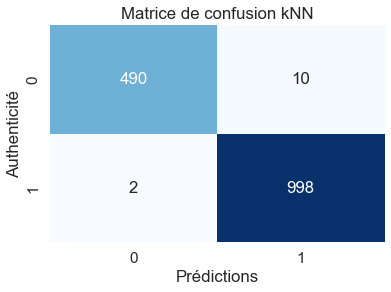

Matrice de confusion :
[ 490 (32.67%), 10 (0.67%) ]
[ 2 (0.13%), 998 (66.53%) ]
Total : 1500


In [131]:
# Préparation des données
X = df_kNN[['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']]
y = df_kNN['is_genuine']

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Construction du modèle kNN
knn = KNeighborsClassifier()
knn.fit(X_scaled, y)

# Prédiction des résultats sur l'ensemble des données
y_pred = knn.predict(X_scaled)

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y, y_pred)
total = sum(sum(conf_matrix))

# Calcul des pourcentages et des totaux
prct = []
for i in range(len(conf_matrix)):
    row = []
    for j in range(len(conf_matrix)):
        row.append(conf_matrix[i][j] / total)
    prct.append(row)

# Graphique:
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Authenticité")
plt.title("Matrice de confusion kNN")
plt.show()

# Affichage des pourcentages et des totaux
print("Matrice de confusion :")
for i in range(len(conf_matrix)):
    row = []
    for j in range(len(conf_matrix)):
        row.append(f"{conf_matrix[i][j]} ({prct[i][j]*100:.2f}%)")
    print("[", ", ".join(row), "]")
print(f"Total : {total}")



### Deploiement du modèle : test sur un df inconnu

In [132]:
# Charger le nouveau dataframe
df_billet_kNN = pd.read_csv("billets_production.csv")
df_billet_kNN .head()

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

In [133]:
df_billet_kNN .shape

(5, 7)

In [134]:
# Charger le nouveau dataframe
df_billet_kNN = pd.read_csv("billets_production.csv")

# Supprimer la colonne id
df_billet_kNN .drop('id', axis=1, inplace=True)

# Standardisation des données
scaler = StandardScaler()
X_billet_scaled = scaler.fit_transform(df_billet_kNN )

# Charger le modèle
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

# Entraîner le modèle sur le jeu de données d'entraînement
X_train_kNN_scaled = scaler.fit_transform(X_train_kNN)
knn.fit(X_train_kNN_scaled, y_train_kNN)

# Prédire les classes du jeu de données billet.csv
y_pred_billet_kNN = knn.predict(X_billet_scaled)

# Convertir les valeurs 0 et 1 en "faux" et "vrai"
y_pred_billet_kNN = ["faux" if p == 0 else "vrai" for p in y_pred_billet_kNN]

# Afficher les prédictions
print(y_pred_billet_kNN)

# Créer un dataframe des prédictions
df_pred_billet_kNN = pd.DataFrame({'diagonal': df_billet_kNN['diagonal'],
                               'height_left': df_billet_kNN['height_left'],
                               'height_right': df_billet_kNN['height_right'],
                               'margin_low': df_billet_kNN['margin_low'],
                               'margin_up': df_billet_kNN['margin_up'],
                               'length': df_billet_kNN['length'],
                               'is_genuine': y_pred_billet_kNN})
df_pred_billet_kNN.head(10)


['faux', 'faux', 'faux', 'vrai', 'vrai']


diagonal  height_left  height_right  margin_low  margin_up  length  \
0    171.76       104.01        103.54        5.21       3.30  111.42   
1    171.87       104.17        104.13        6.00       3.31  112.09   
2    172.00       104.58        104.29        4.99       3.39  111.57   
3    172.49       104.55        104.34        4.44       3.03  113.20   
4    171.65       103.63        103.56        3.77       3.16  113.33   

  is_genuine  
0       faux  
1       faux  
2       faux  
3       vrai  
4       vrai

# **CHOIX DU MODELE LE PLUS PERFORMANT**

## Comparaison des performances

In [135]:
# Calculer l'accuracy pour chaque modèle
accuracy_kmeans = accuracy_score(df_kMeans_test['is_genuine'], df_kMeans_test['cluster'])
accuracy_reg = accuracy_score(y_test, y_test_pred)
accuracy_knn = accuracy_score(y_test_kNN, y_pred_kNN)

# Afficher les résultats
print(f"Accuracy KMeans : {accuracy_kmeans}")
print(f"Accuracy Regression logistique : {accuracy_reg}")
print(f"Accuracy kNN : {accuracy_knn}")

Accuracy KMeans : 0.9833333333333333
Accuracy Regression logistique : 0.9833333333333333
Accuracy kNN : 0.9833333333333333


In [136]:
# Calculer l'accuracy pour chaque modèle
accuracy_kmeans = accuracy_score(df_kmeans['is_genuine'], df_kmeans['cluster'])
accuracy_reg = accuracy_score(y, y_pred)
accuracy_knn = accuracy_score(y_train_kNN, y_pred_train_kNN)

# Afficher les résultats
print(f"Accuracy KMeans : {accuracy_kmeans}")
print(f"Accuracy Regression logistique : {accuracy_reg}")
print(f"Accuracy kNN : {accuracy_knn}")

Accuracy KMeans : 0.984
Accuracy Regression logistique : 0.992
Accuracy kNN : 0.9908333333333333


## Test soutenance 

In [ ]:
# Charger le nouveau dataframe
df_billet_log = pd.read_csv("df.csv")

# Utiliser le modèle pour prédire les résultats sur un nouveau dataframe
X_new = df_billet_log[['margin_low','height_right', 'margin_up', 'length']]
y_pred = logreg.predict(X_new)

# Créer une colonne avec les prédictions en format texte
df_billet_log['is_genuine_predicted'] = np.where(y_pred==0, "faux", "vrai")
df_billet_log
